## __SCODA explorer__ 
Dec. 07, 2023, MLBI-lab

- 이 주피터 노트북은 SCODA 결과를 시각화하여 확인하고 데이터 마이닝을 수행할 수 있는 코드 예제를 제공합니다. 
- 이 주피터 노트북을 사용하려면 <a href=https://mlbi-lab.net>SCODA pipeline</a>을 실행한 후 다운 받으신 SCODA 결과 파일 (xxx_results.tar.gz)이 현재 사용 중인 PC 혹은 테블릿에 저장되어 있어야 합니다.
- __Local PC에서 실행된 주피터를 사용할 경우,__ 스텝 __1A__ 의 단계에 따라 진행하면 됩니다.
- __Google Colab을 사용할 경우,__ 아래 스텝 __1B__ 또는 __1C__ 의 단계에 따라 진행하면 됩니다.

### __1A. Local PC에서 실행된 주피터를 사용할 경우__
Local PC에서 실행된 주피터 프로그램으로 이 주피터 노트북을 실행 중인 경우, 다음 단계에 따라 진행하면 됩니다.

1. 다운 받은 SCODA 결과 파일 (xxx_results.tar.gz)의 압축을 풀어 h5ad 파일을 얻습니다.
2. h5ad 파일을 이 주피터 노트북 파일이 저장된 폴더에 복사합니다. (또는 파일의 경로를 확인 합니다.)
3. 아래의 코드셀에서 변수 file_h5ad를 압축해제된 h5ad파일의 경로/파일명으로 설정하여 실행하고 스텝 __2__ 로 갑니다.

In [1]:
file_h5ad = '압축해제된 h5ad파일의 경로/파일명으로 대체' 

### __1B. Google Colab에서 사용할 경우__
Google Colab에서 이 주피터 노트북을 실행 중인 경우, 아래의 코드셀를 실행하여 업로드 가능합니다.\
다만 Google colab을 사용하려면 구글 계정이 있어야 하는데 
다음의 단계에 따라 진행하면 됩니다.

1. 우측 상단의 "로그인" 버튼을 누르신 후, 구글 계정이 있다면 계정에 로그인을 하면 되고, 계정이 없으면 새로 만드신 후 로그인하면 됩니다. 계정에 로그인 했다면 다음으로 넘어 갑니다.
2. 구글 계정에 로그인된 상태에서 아래 코드를 실행하면 업로드할 파일을 선택할 수 있는 파일 선택 버튼이 나옵니다.
3. 그 버튼을 눌러 업로드할 파일 (압축되어 있는 SCODA 결과 파일)을 선택하고 구글 서버에 업로드 합니다.
    - 업로드 중에 진행 상황이 나오는데 무료 사용의 경우 업로드 시간이 꽤 걸립니다.
    - 혹시라도 오류가 났다면 다음의 스텝 __1C__ 의 방법을 사용하여 업로드 하십시오.
    - 업로드가 완료되면 자동으로 압축이 해제되어 h5ad 파일이 생성되고 file_h5ad 변수가 해당 파일명으로 설정됩니다.

In [ ]:
from google.colab import files
import os, tarfile, shutil

## Upload the downloaded tar.gz file
uploaded = files.upload()
uploaded_file = list(uploaded.keys())[0]
display(uploaded_file)

## Decompress uploaded tar.gz file and move it to the current directory
if uploaded_file.split('.')[-1] == 'gz':
    extract_path = 'uploaded'
    with tarfile.open(uploaded_file, "r:gz") as tar:
        tar.extractall(path=extract_path)
        
    file_h5ad = os.listdir(extract_path)[0]
    file = extract_path + '/%s' % file_h5ad
    if os.path.isdir(file):
        file_h5ad = os.listdir(file)[0]
        file = file + '/%s' % (file_h5ad)
        
    shutil.move(file, '.')
    print('Your file: %s' % file_h5ad)

### __1C. Google Colab에서 사용할 경우 (1B 단계 에서 오류가 난 경우)__

__1B__ 단계 에서 오류가 났다면, 직접 업로드를 해야 합니다. 다음의 단계를 따라 진행합니다. 

1. __1B__ 의 첫번째 단계에 따라 구글계정에 로그인 합니다. 
2. Colab 서버에서 이 주피터 노트북을 열었다면 좌측에 아이콘이 몇개 보입니다.
3. 이 아이콘들 중 폴더(파일) 형태의 아이콘(아마도 맨 마지막 아이콘)이 보이는데 이걸 클릭합니다. 
4. 그러면 좌측에 폴더 뷰가 나오고 폴더 뷰 상단에 몇 개 아이콘이 보입니다.
5. 이 아이콘들 중 파일 업로드 아이콘(네모 박스안에 위 방향 화살표가 있는 아이콘)을 클릭합니다.
6. 그러면 파일선택 창이 뜨는데 업로드할 파일(압축되어 있는 SCODA 결과 파일)을 선택하고 업로드 합니다. (혹은 업로드할 파일을 파일 뷰안으로 drag & drop 합니다.)
    - 폴더 뷰 아래에 업로드 진행 상황이 나오니 업로드가 완료될 때까지 기다립니다.
7. 업로드가 완료되어 폴더 뷰에 해당 파일이 업로드 된 것을 확인했다면 다음의 코드를 실행합니다.
    - 아래 코드는 압축을 해제하여 h5ad 파일을 얻고 file_h5ad 변수를 해당 파일명으로 설정합니다.

In [45]:
flst = os.listdir()
uploaded_file = None
for f in flst:
    if f.split('.')[-1] == 'gz':
        uploaded_file = f
display(uploaded_file)

## Decompress uploaded tar.gz file and move it to the current directory
if uploaded_file.split('.')[-1] == 'gz':
    extract_path = 'uploaded'
    with tarfile.open(uploaded_file, "r:gz") as tar:
        tar.extractall(path=extract_path)
        
    file_h5ad = os.listdir(extract_path)[0]
    file = extract_path + '/%s' % file_h5ad
    if os.path.isdir(file):
        file_h5ad = os.listdir(file)[0]
        file = file + '/%s' % (file_h5ad)
        
    shutil.move(file, '.')
    print('Your file: %s' % file_h5ad)

### __2. Install required packages and import them__
이제 파일이 준비되었으니 필요한 패키지를 설치하고 이를 불러와서(import해서) 데이터를 들여다 볼 수 있습니다.

In [ ]:
## 필요한 패키지 설치 (이미 설치되었다면 skip 해도 됩니다.)
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install scikit-learn
!pip install scikit-network
!pip install seaborn
!pip install scanpy
!pip install scoda-viz

In [92]:
## 필요한 패키지 불러오기
import copy, warnings
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

from scodaviz.plotlib import get_population, plot_population, plot_population_grouped
from scodaviz.plotlib import plot_sankey_e, get_gsa_summary, plot_gsa_all
from scodaviz.plotlib import plot_cci_dot, plot_cci_circ_group, get_markers_from_deg
from scodaviz.plotlib import cci_get_ni_mat, plot_cnv, plot_marker_exp, plot_deg, plot_gsa_res

warnings.filterwarnings('ignore') 

### __3. Load data__

In [93]:
## 위 단계가 성공적이 었다면 file_h5ad는 압축해제된 h5ad파일의 경로/파일명으로 설정되어 있을 겁니다.
# file_h5ad = '압축해제된 h5ad파일의 경로/파일명으로 대체'

In [94]:
### Load data #####
adata_t = sc.read_h5ad(file_h5ad)
adata_t

AnnData object with n_obs × n_vars = 12000 × 19438
    obs: 'Patient', 'Percent_mito', 'nCount_RNA', 'nFeature_RNA', 'Celltype_Major', 'Celltype_Minor', 'Celltype_Subset', 'subtype', 'gene_module', 'Calls', 'normal_cell_call', 'CNA_value', 'sample', 'condition', 'celltype_major', 'celltype_minor', 'celltype_subset', 'cnv_score', 'cnv_cluster', 'tumor_dec', 'tumor_score', 'ref_ind', 'celltype_minor_rev'
    var: 'gene_ids', 'variable_genes'
    uns: 'CCI', 'CCI_sample', 'Celltype_marker_DB', 'DEG', 'DEG_stat', 'GSA_down', 'GSA_up', 'cnv', 'cnv_addon_summary', 'cnv_neighbors_info', 'cnv_ref_celltypes'
    obsm: 'HiCAT_result', 'X_cnv', 'X_cnv_pca', 'X_pca', 'cnv_addon_results'
    obsp: 'cnv_neighbor_graph_connectivity', 'cnv_neighbor_graph_distance'

### __4. Check your data__
#### UMAP and celltype annotation

In [12]:
adata = adata_t[:,:]

## UMAP with celltype annotation, sample, condition
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes = 2000) 

## PCA
sc.tl.pca(adata, n_comps = 15, use_highly_variable = True)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=15, use_rep = 'X_pca')
sc.tl.umap(adata) 

In [36]:
col = 'celltype_major'
lst = list(adata.obs[col].unique())
lst2 = ['Epi', 'T cell', 'SMC', 'Fib', 'Myeloid', 'Endo', 'B cell']
rend = dict(zip(lst, lst2))
display(rend)

adata.obs[col] = adata.obs[col].astype(str)
adata.obs[col].replace(rend, inplace = True)
# adata.obs[col].value_counts()

celltype_major
T cell     4766
Epi        3538
B cell     1114
Myeloid     817
Fib         706
Endo        547
SMC         512
Name: count, dtype: int64

In [37]:
col = 'celltype_minor'
lst = list(adata.obs[col].unique())
lst2 = ['Epi', 'CD4+ T', 'CD8+ T', 'SMC', 'Fib', 'DC', 'Endo', 'Mac', 'B cell', 'Plasma', 'ILC', 'NK']
rend = dict(zip(lst, lst2))
display(rend)

adata.obs[col] = adata.obs[col].astype(str)
adata.obs[col].replace(rend, inplace = True)
# adata.obs[col].value_counts()

{'Epi': 'Epi',
 'CD4+ T': 'CD4+ T',
 'CD8+ T': 'CD8+ T',
 'SMC': 'SMC',
 'Fib': 'Fib',
 'DC': 'DC',
 'Endo': 'Endo',
 'Mac': 'Mac',
 'B cell': 'B cell',
 'Plasma': 'Plasma',
 'ILC': 'ILC',
 'NK': 'NK'}

In [ ]:
col = 'celltype_subset'
lst = list(adata.obs[col].unique())
lst2 = ['Epi', 'T_Naive', 'T_Cyto', 'SMC', 'Th17', 'Fib', 'Treg', 'pDC', 'Endo', 'Mac_M1',
 'BMZ', 'Bf', 'Tfh', 'Mac_M2a', 'Th2', 'Plasma', 'Bmem', 'Mac_M2c', 'Th1', 'Breg', 'Th22',
 'Mac_M2b', 'ILC1', 'LTI', 'Mac_M2d', 'NK', 'Th9', 'ILCreg', 'ILC2', 'ILC3(-)', 'ILC3(+)']
rend = dict(zip(lst, lst2))
display(rend)

adata.obs[col] = adata.obs[col].astype(str)
adata.obs[col].replace(rend, inplace = True)

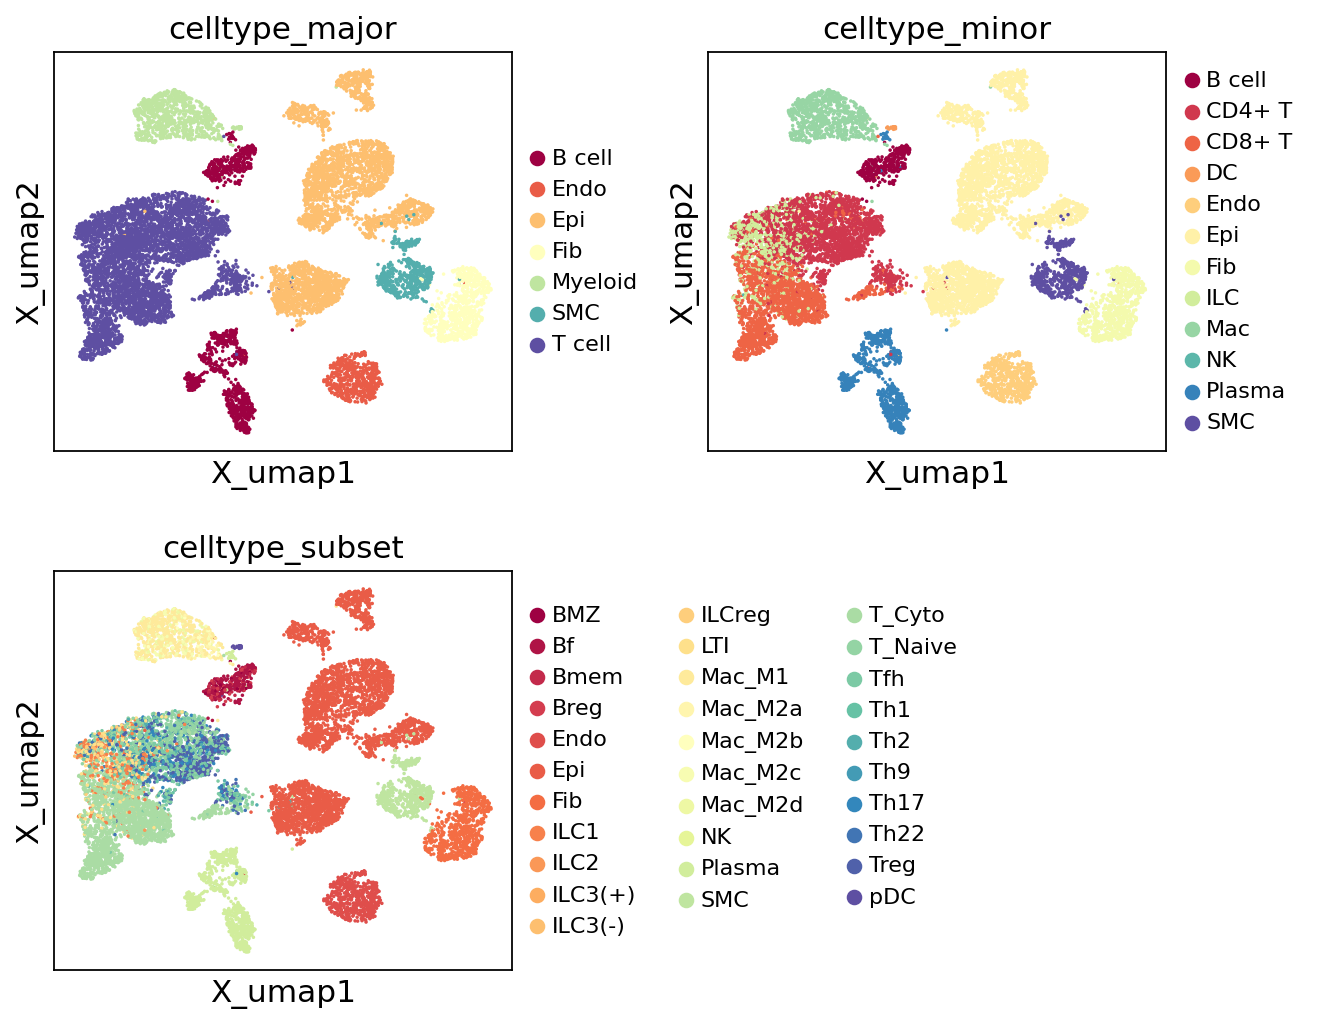

In [35]:
items_to_plot = ['celltype_major', # 'condition', 'sample', 
                 'celltype_minor', 'celltype_subset'] 

ws_hs = (0.3, 0.3)
sc.settings.set_figure_params(figsize=(3.5, 3.5), dpi=80, facecolor='white')
fig = sc.pl.embedding( adata, basis = 'X_umap', neighbors_key = 'neighbors',
                       color=items_to_plot, wspace = ws_hs[0], hspace = ws_hs[1], legend_fontsize = 10, 
                       ncols = 2, palette = 'Spectral', return_fig = True) #, add_outline = True) 

plt.show()

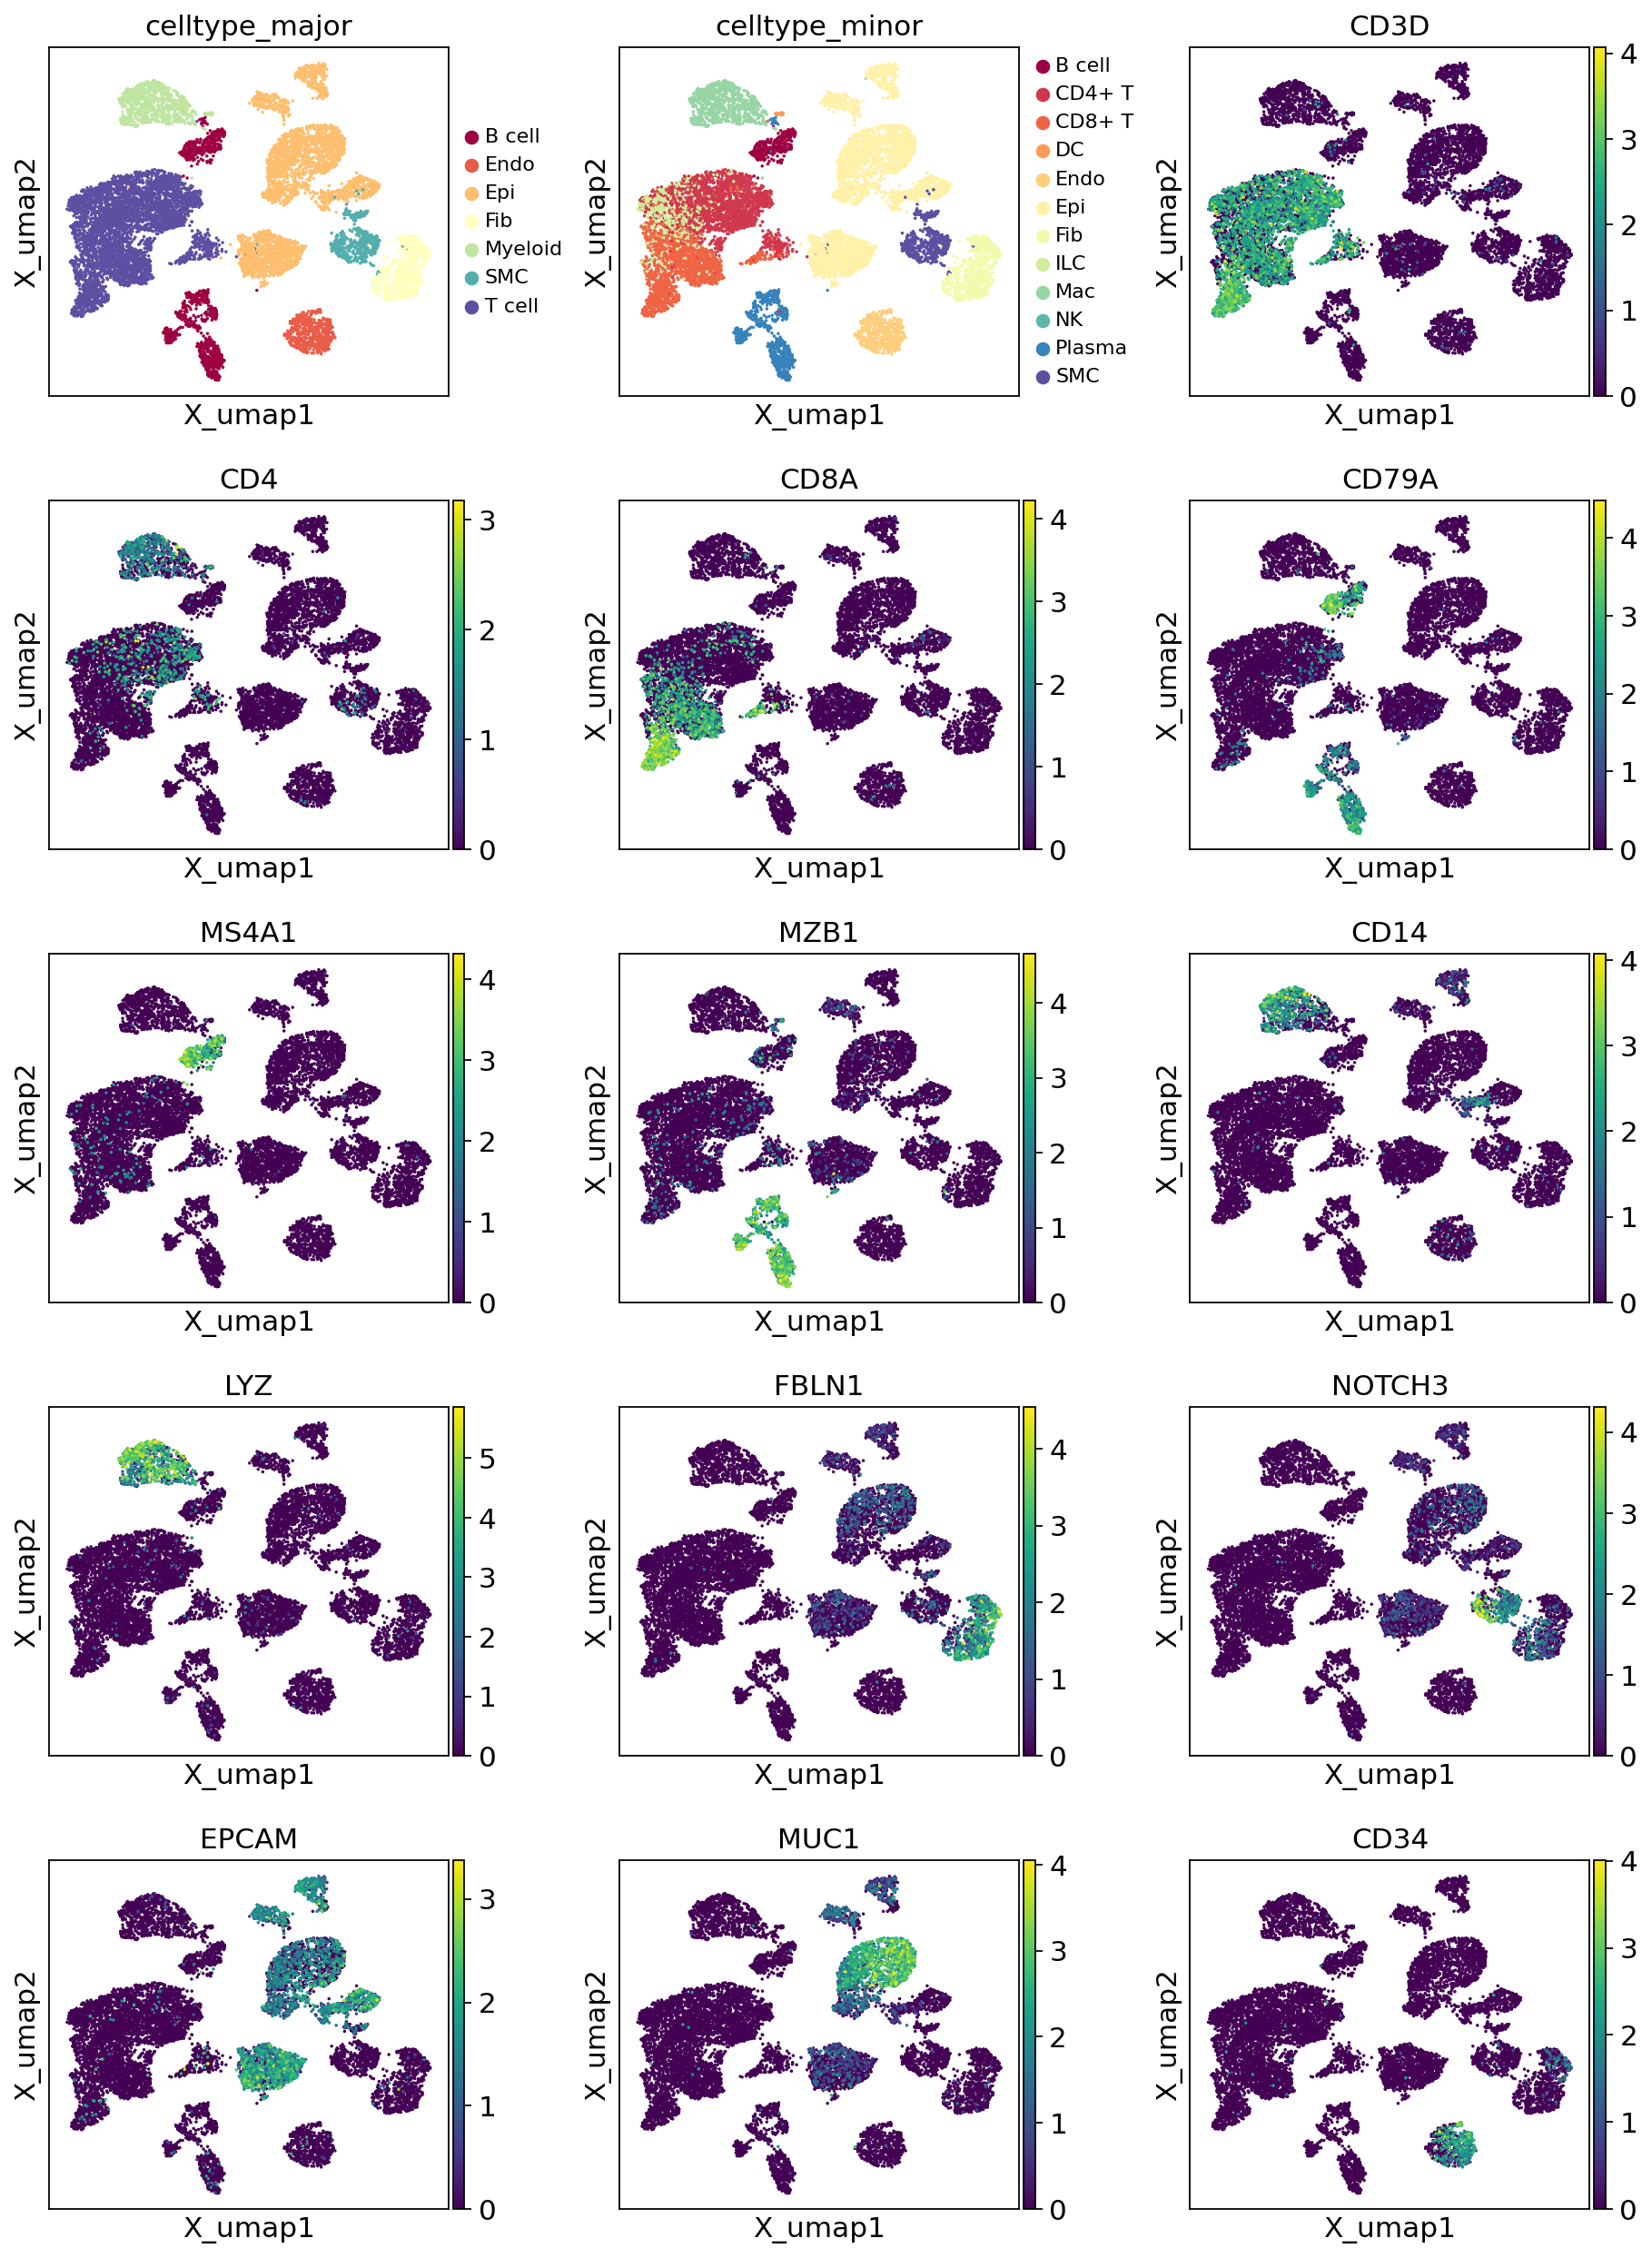

In [34]:
items_to_plot = ['celltype_major', 'celltype_minor']

genes = ['CD3D', 'CD4', 'CD8A', 'CD79A', 'MS4A1', 'MZB1', 
         'CD14', 'LYZ', 'FBLN1', 'NOTCH3', 'EPCAM', 'MUC1',  'CD34']
genes_all = list(adata.var.index.values)
for g in genes:
    if g in genes_all:
        items_to_plot = items_to_plot + [g] 

ws_hs = (0.3, 0.3)
sc.settings.set_figure_params(figsize=(3.5, 3.5), dpi=80, facecolor='white')
fig = sc.pl.embedding( adata, basis = 'X_umap', neighbors_key = 'neighbors',
                       color=items_to_plot, wspace = ws_hs[0], hspace = ws_hs[1], legend_fontsize = 10, 
                       ncols = 3, palette = 'Spectral', return_fig = True) #, add_outline = True) 

plt.show()

### Marker expression pattern

Num markers selected: 139 -> 90


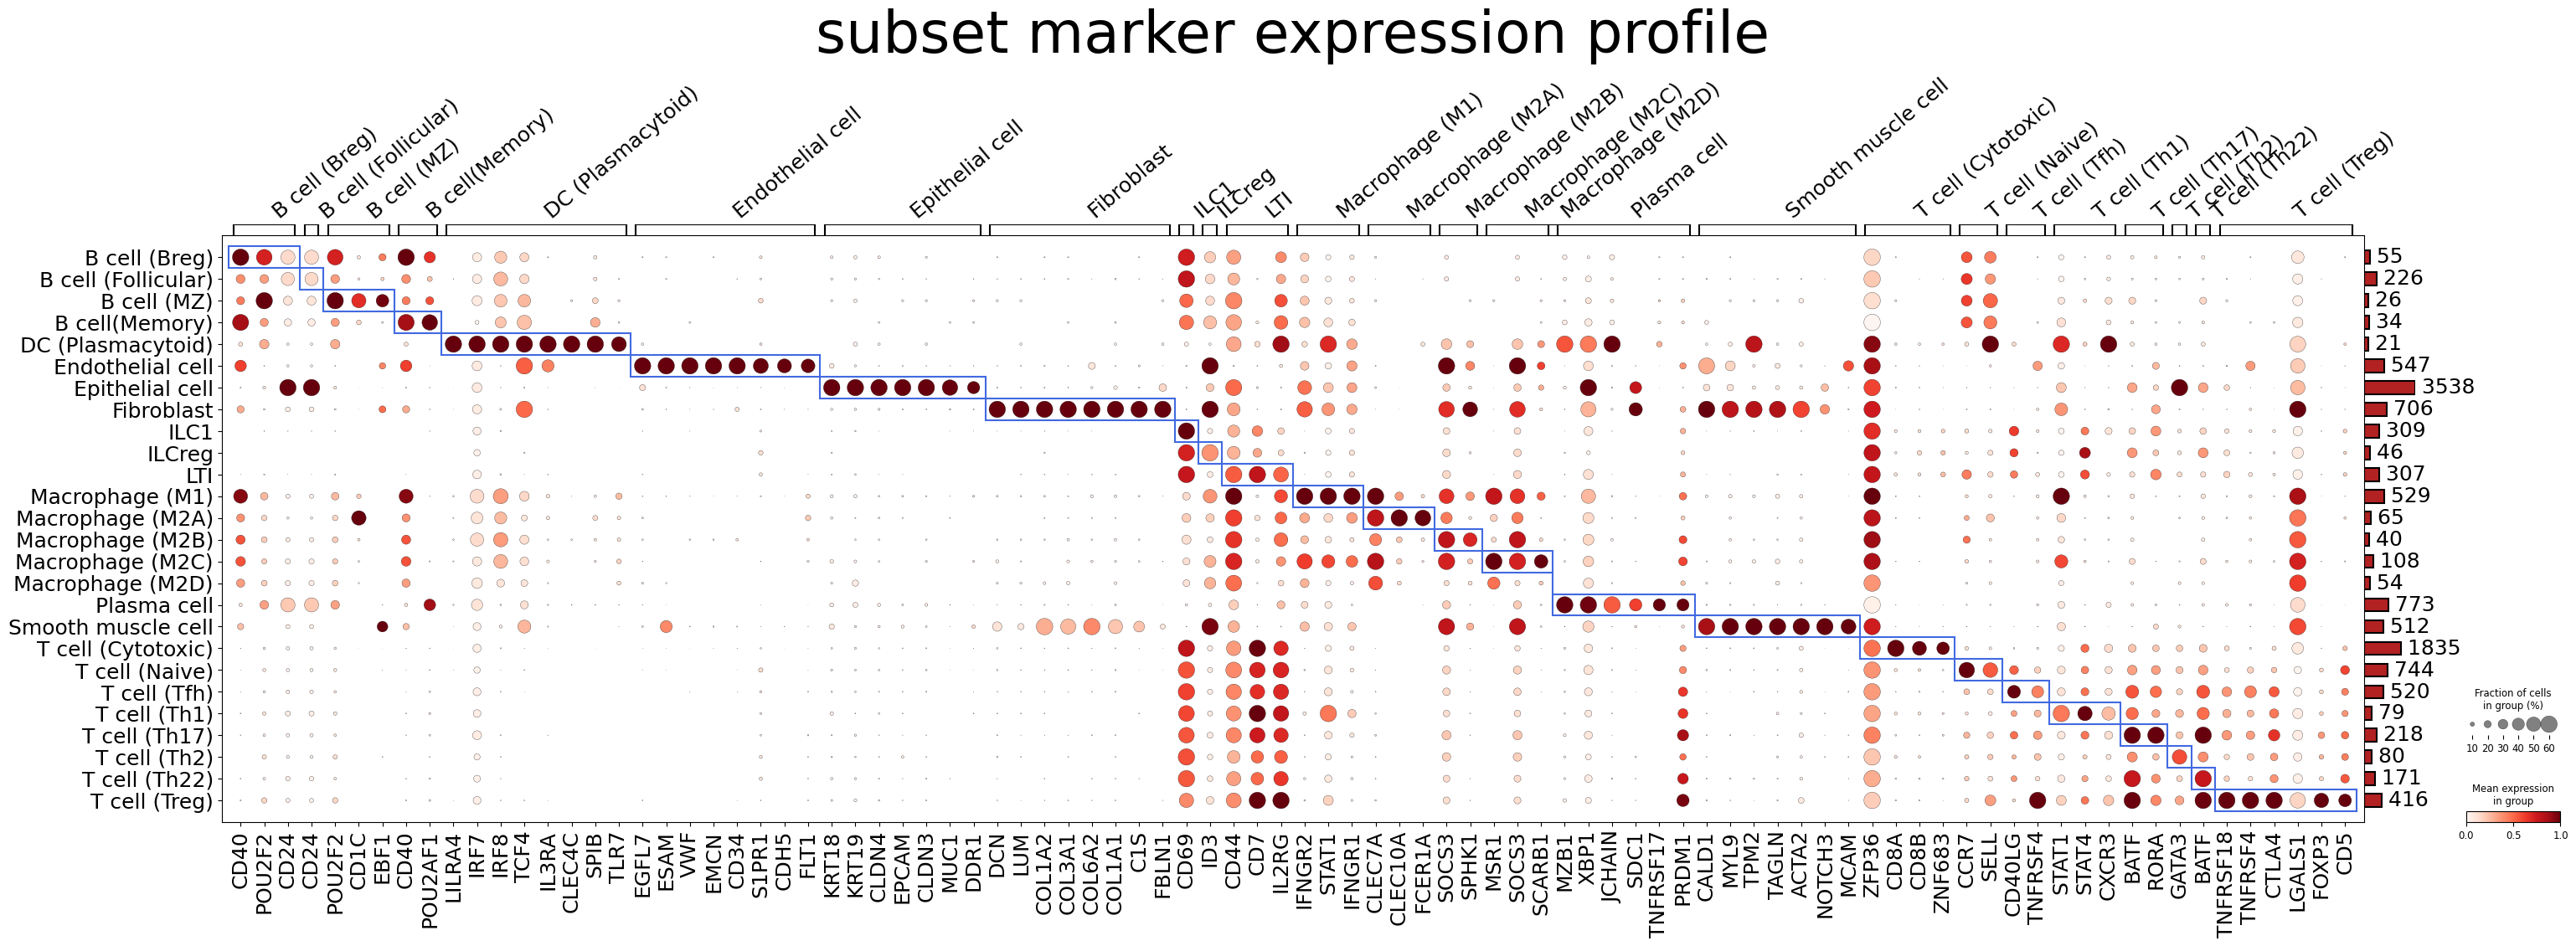

In [4]:
mkr_dict = copy.deepcopy( adata_t.uns['Celltype_marker_DB']['subset_markers_dict'] )
var_group_col = 'celltype_subset'
title = 'subset marker expression profile'

plot_marker_exp(  adata_t, markers = mkr_dict, 
                  var_group_col = var_group_col, group_col = None, 
                  title = title, title_y_pos = 1.3, title_fs = 50, 
                  text_fs = 18, linewidth = 1.5, standard_scale = 'var',
                  var_group_rotation = 40, var_group_height = 1.2, 
                  nz_frac_max = 0.6, nz_frac_cutoff = 0.05, 
                  rem_mkrs_common_in_N_groups_or_more = 3, N_cells_min = 20,
                  N_markers_per_group_max = 8, N_markers_total = 90, 
                  figsize = None, swap_ax = False, legend = True )


### Cell Population

In [46]:
celltype_col = 'celltype_minor'
if celltype_col not in list(adata_t.obs.columns.values):
    celltype_col = 'celltype_minor'

df_cnt, df_pct= get_population( adata_t.obs['sample'], 
                                adata_t.obs[celltype_col], sort_by = [] )
df_cnt

B cell Dendritic cell Endothelial cell Epithelial cell Fibroblast  \
CID3921      99              0              134             292         73   
CID3948      74              0               70             227          6   
CID4066      12              0              182             276        355   
CID4067      28              0               98            1226         72   
CID44971    104             20               48             391        139   
CID44991     24              1               15            1126         61   

          ILC Macrophage NK cell Plasma cell Smooth muscle cell T cell CD4+  \
CID3921   103        252       0         113                 51         643   
CID3948   296         97       0         204                 62         510   
CID4066   178         92       0           1                279         265   
CID4067    93        152       0           2                 49         130   
CID44971   21        146       2          11                 52         533   
CID44991    0         57       0         442                 19         157   

         T cell CD8+  
CID3921          240  
CID3948          454  
CID4066          360  
CID4067          150  
CID44971         533  
CID44991          98

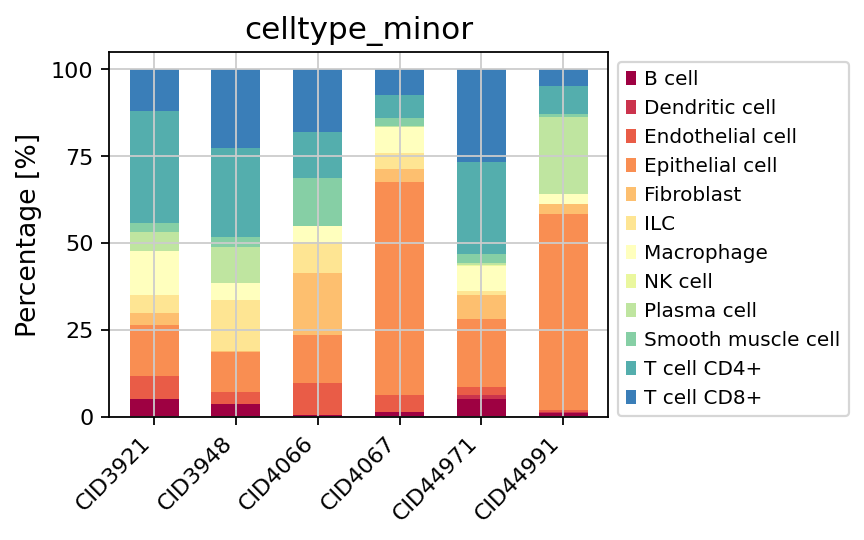

In [47]:
plot_population( df_pct, bar_width = 0.6,
                 title = celltype_col, title_fs = 14, 
                 label_fs = 12, tick_fs = 10, xtick_rot = 45, xtick_ha = 'right',
                 legend_fs = 9, legend_loc = 'upper left', bbox_to_anchor = (1,1), 
                 legend_ncol = 1, cmap_name = None, figsize=(4, 3))

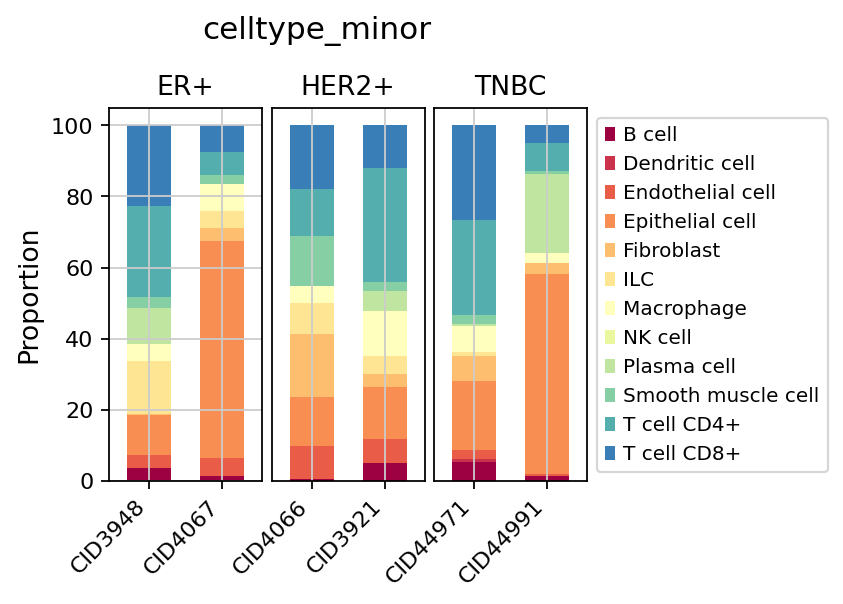

In [48]:
sample_group_map = {}
slst = list(df_cnt.index.values)
for s in slst:
    b = adata_t.obs['sample'] == s
    g = list(adata_t.obs.loc[b, 'condition'])[0]
    sample_group_map[s] = g
    
plot_population_grouped( df_pct, sample_group_map, sort_by = ['Epithelial cell'], bar_width = 0.6,
                         title = celltype_col, title_fs = 14, title_y_pos = 1.11,
                         label_fs = 12, tick_fs = 10, xtick_rot = 45, xtick_ha = 'right',
                         legend_fs = 9, legend_loc = 'upper left', bbox_to_anchor = (1,1), 
                         legend_ncol = 1, cmap_name = None, figsize=(4, 3))

### CNV & tumor cell identification 
#### <font color=blue>(This works only if you checked "Tumor Identification" box when running SCODA)</font>

In [49]:
adata_t.uns['cnv_ref_celltypes']

array(['B cell', 'Myeloid cell', 'T cell', 'Fibroblast'], dtype=object)

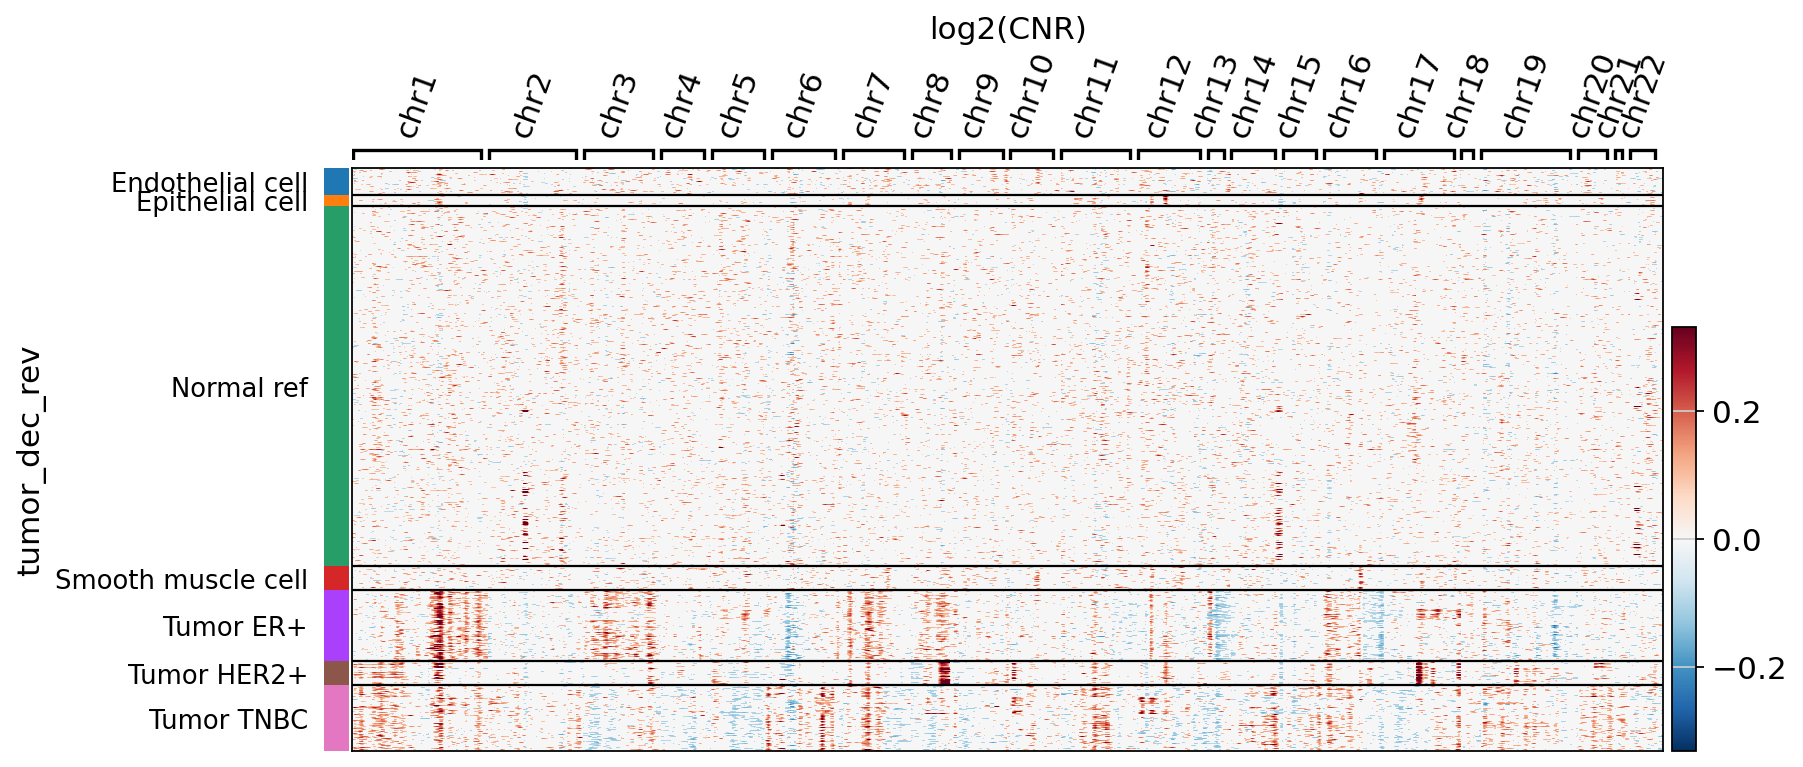

In [54]:
adata = adata_t[:,:]

cond_col = 'condition'
clst = adata.obs[cond_col].unique()
adata.obs['tumor_dec_rev'] = adata.obs['celltype_major'].copy(deep = True).astype(str)

if 'cnv_ref_celltypes' in adata.uns.keys():
    b = adata.obs['tumor_dec_rev'].isin(adata.uns['cnv_ref_celltypes'])
    adata.obs.loc[b, 'tumor_dec_rev'] = 'Normal ref'
    
for c in clst:
    b = (adata.obs[cond_col] == c) & (adata.obs['tumor_dec'] == 'Tumor')
    s = 'Tumor %s' % c
    adata.obs.loc[b, 'tumor_dec_rev'] = s

axd = plot_cnv( adata, groupby = 'tumor_dec_rev', 
                title = 'log2(CNR)', title_fs = 14, title_y_pos = 1.2, 
                figsize = (11, 5), swap_axes = False, 
                var_group_rotation = 70, cmap='RdBu_r', vmax = 1)

In [56]:
# adata = adata_t[:,:]

ad_tmp = sc.tl.umap(adata, neighbors_key = 'cnv_neighbors_info', copy = True)   
adata.obsm['X_cnv_umap'] = ad_tmp.obsm['X_umap']

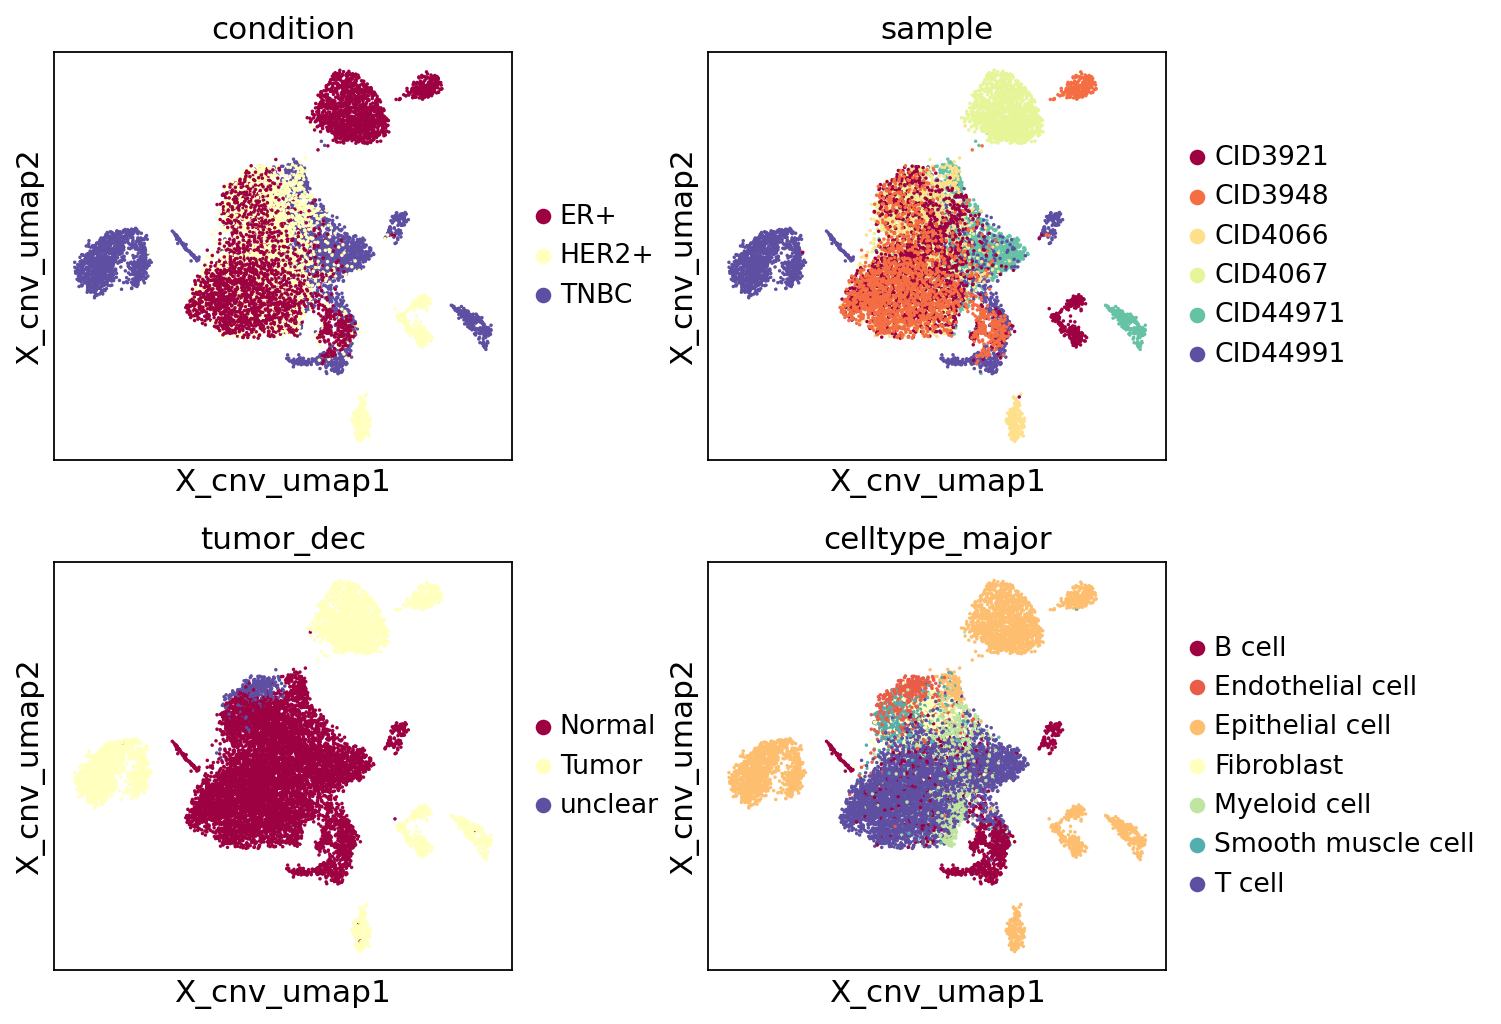

In [63]:
items_to_plot = ['condition', 'sample', 'tumor_dec', 'celltype_major'] 

sc.settings.set_figure_params(figsize=(3.5, 3.5), dpi=80, facecolor='white')
fig = sc.pl.embedding( adata, basis = 'X_cnv_umap', neighbors_key = 'cnv_neighbors',
                       color=items_to_plot, wspace = 0.3, legend_fontsize = 12, ncols = 2, 
                       palette = 'Spectral', return_fig = False) #, add_outline = True) 
plt.show()

### cell-cell interaction

In [4]:
df_dct = adata_t.uns['CCI']
cond_lst = list(df_dct.keys())
cond_lst

['ER+', 'HER2+', 'TNBC']

In [5]:
df_lst = cci_get_ni_mat( df_dct, remove_common = True )

In [6]:
df_lst.keys()

dict_keys(['ER+', 'HER2+', 'TNBC'])

In [7]:
lst = list(df_lst['HER2+'].columns.values)
lst2 = ['B cell', 'Endo', 'Epi', 'Fib',
       'ILC', 'Mac', 'Plasma', 'SMC',
       'T_CD4', 'T_CD8']

rend = dict(zip(lst, lst2))
rend

{'B cell': 'B cell',
 'Endothelial cell': 'Endo',
 'Epithelial cell': 'Epi',
 'Fibroblast': 'Fib',
 'ILC': 'ILC',
 'Macrophage': 'Mac',
 'Plasma cell': 'Plasma',
 'Smooth muscle cell': 'SMC',
 'T cell CD4+': 'T_CD4',
 'T cell CD8+': 'T_CD8'}

In [8]:
for k in df_lst.keys():
    df_lst[k].rename(columns = rend, index = rend, inplace = True)

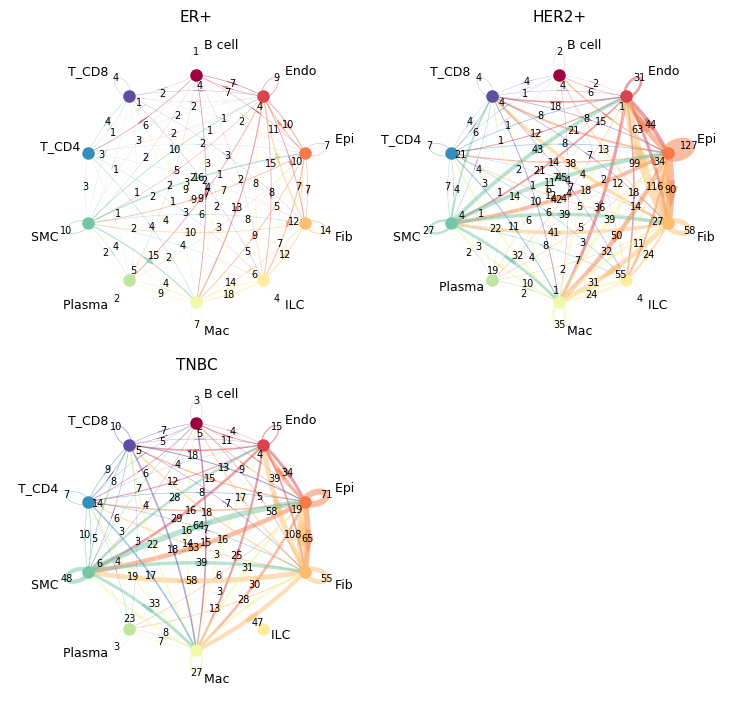

In [20]:
plot_cci_circ_group( df_lst, ncol = 2, figsize = (3.5,3.5), 
                     title = None, title_y_pos = 1.1, title_fs = 24, 
                     text_fs = 9, num_fs = 7, margin = 0.08, alpha = 0.5, 
                     R_curvature = 3, linewidth_max = 8, linewidth_log = False, 
                     node_size = 8, rot = False, cmap = 'Spectral', 
                     wspace = 0.2, hspace = 0.1 )

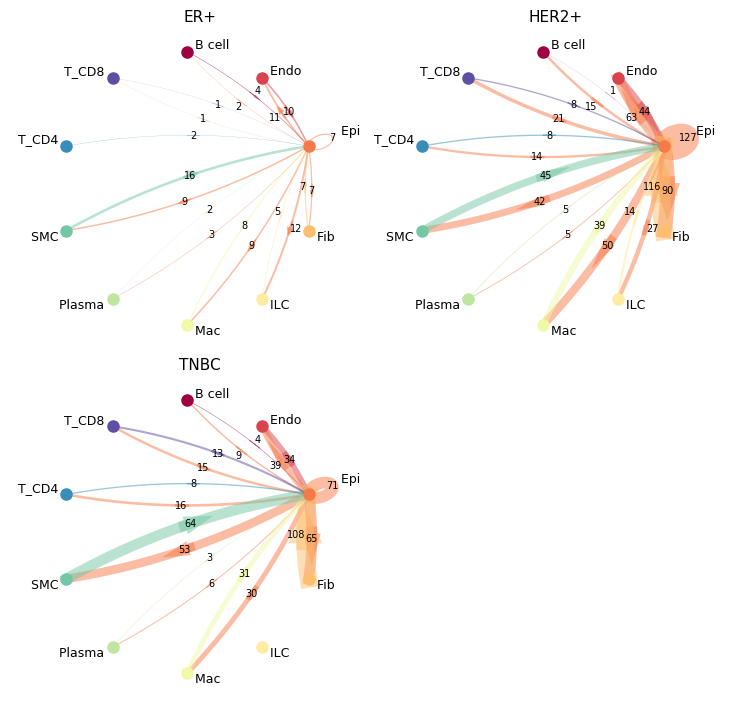

In [22]:
target = 'Epi'
df_lst2 = {}
for key in df_lst.keys():
    df = df_lst[key]
    msk = df.copy(deep = True)
    msk.loc[:,:] = 0
    msk.loc[target,:] = 1
    msk.loc[:,target] = 1
    df_lst2[key] = df*msk
    
plot_cci_circ_group( df_lst2, ncol = 2, figsize = (3.5,3.5), title = None, title_y_pos = 1.1, 
                 title_fs = 24, text_fs = 9, num_fs = 7, margin = 0.08, alpha = 0.5, 
                 R_curvature = 3, linewidth_max = 15, linewidth_log = False, 
                 node_size = 8, rot = False, cmap = 'Spectral', 
                 wspace = 0.15, hspace = 0.1 )

14 cell_pairs, 17 gene_pairs found


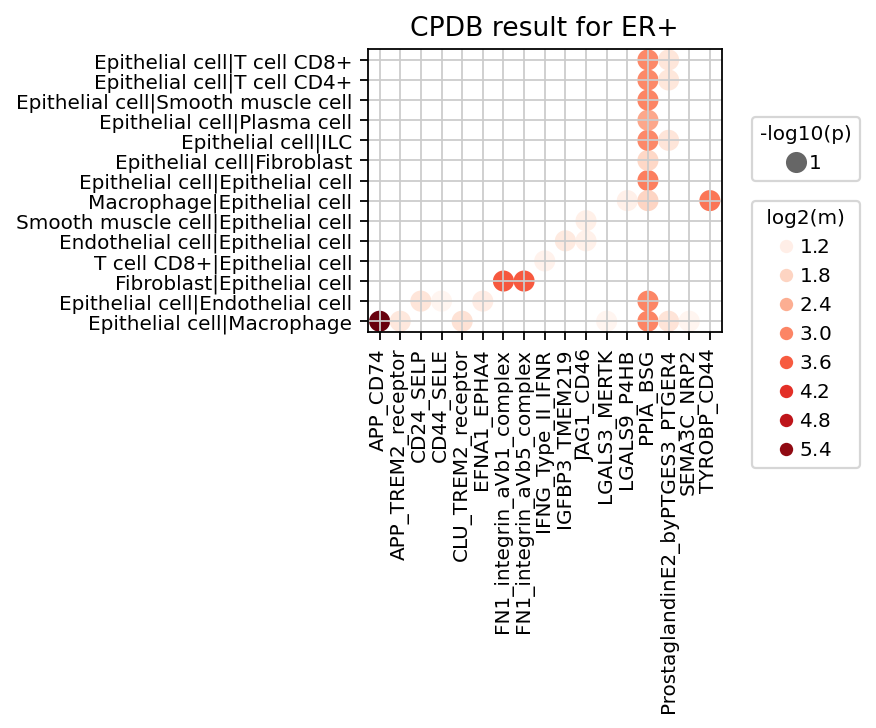

17 cell_pairs, 121 gene_pairs found


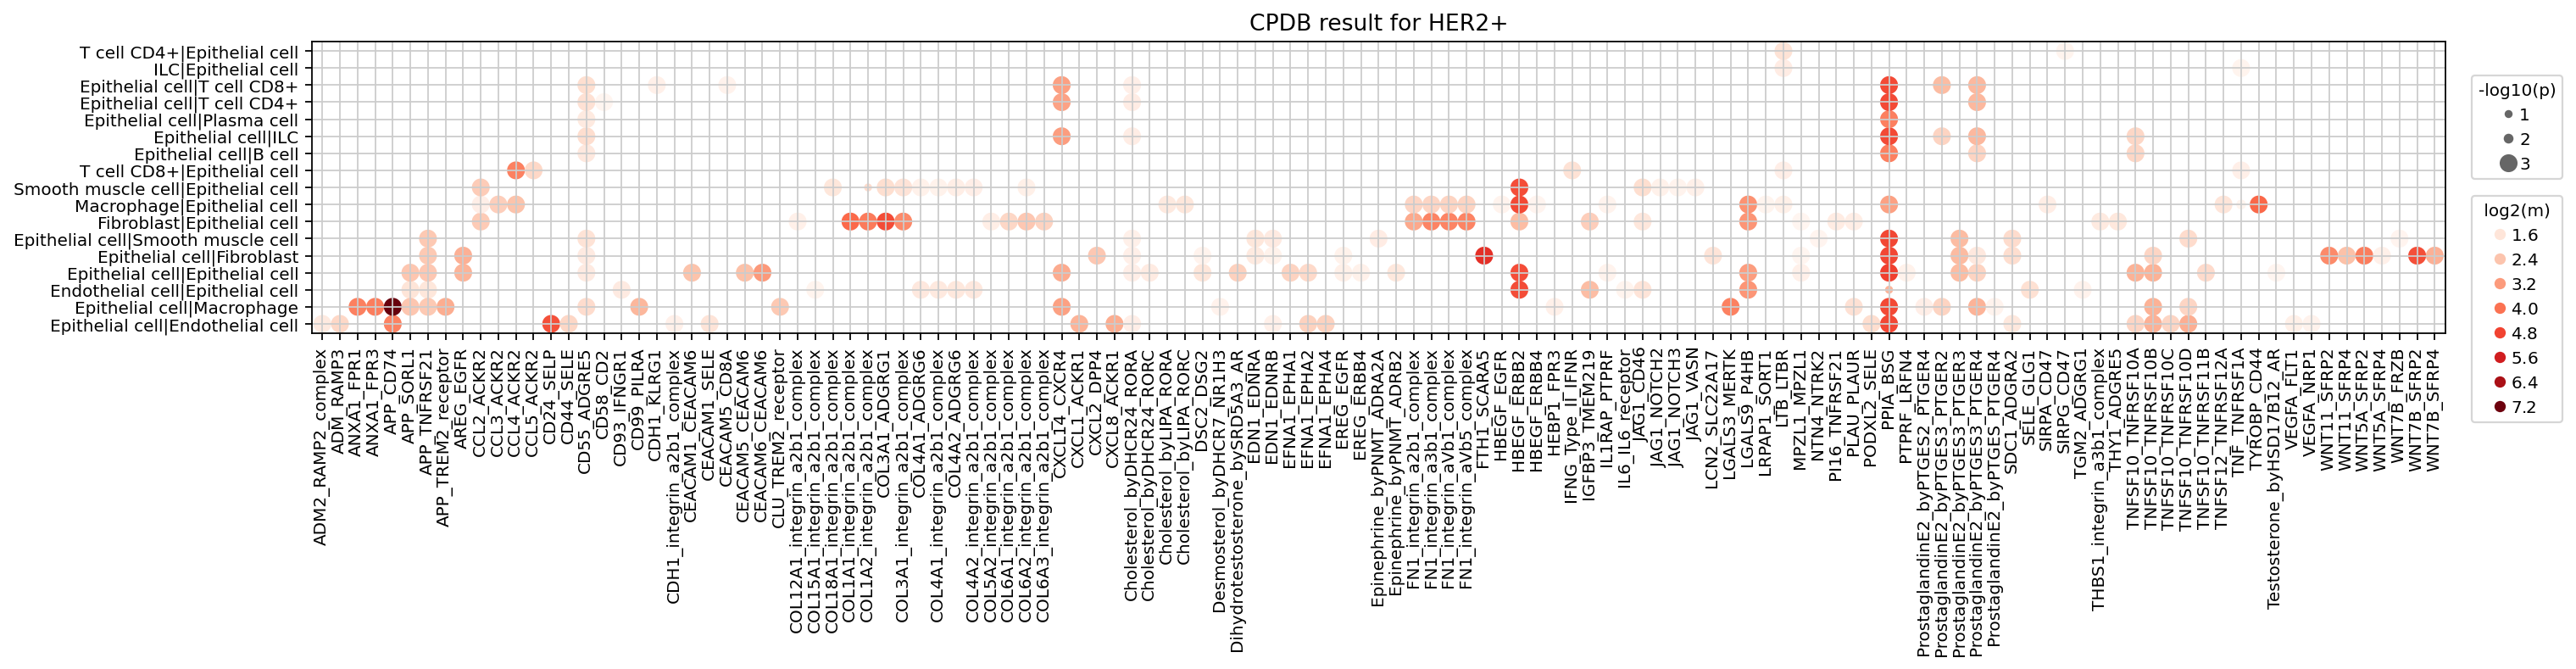

16 cell_pairs, 71 gene_pairs found


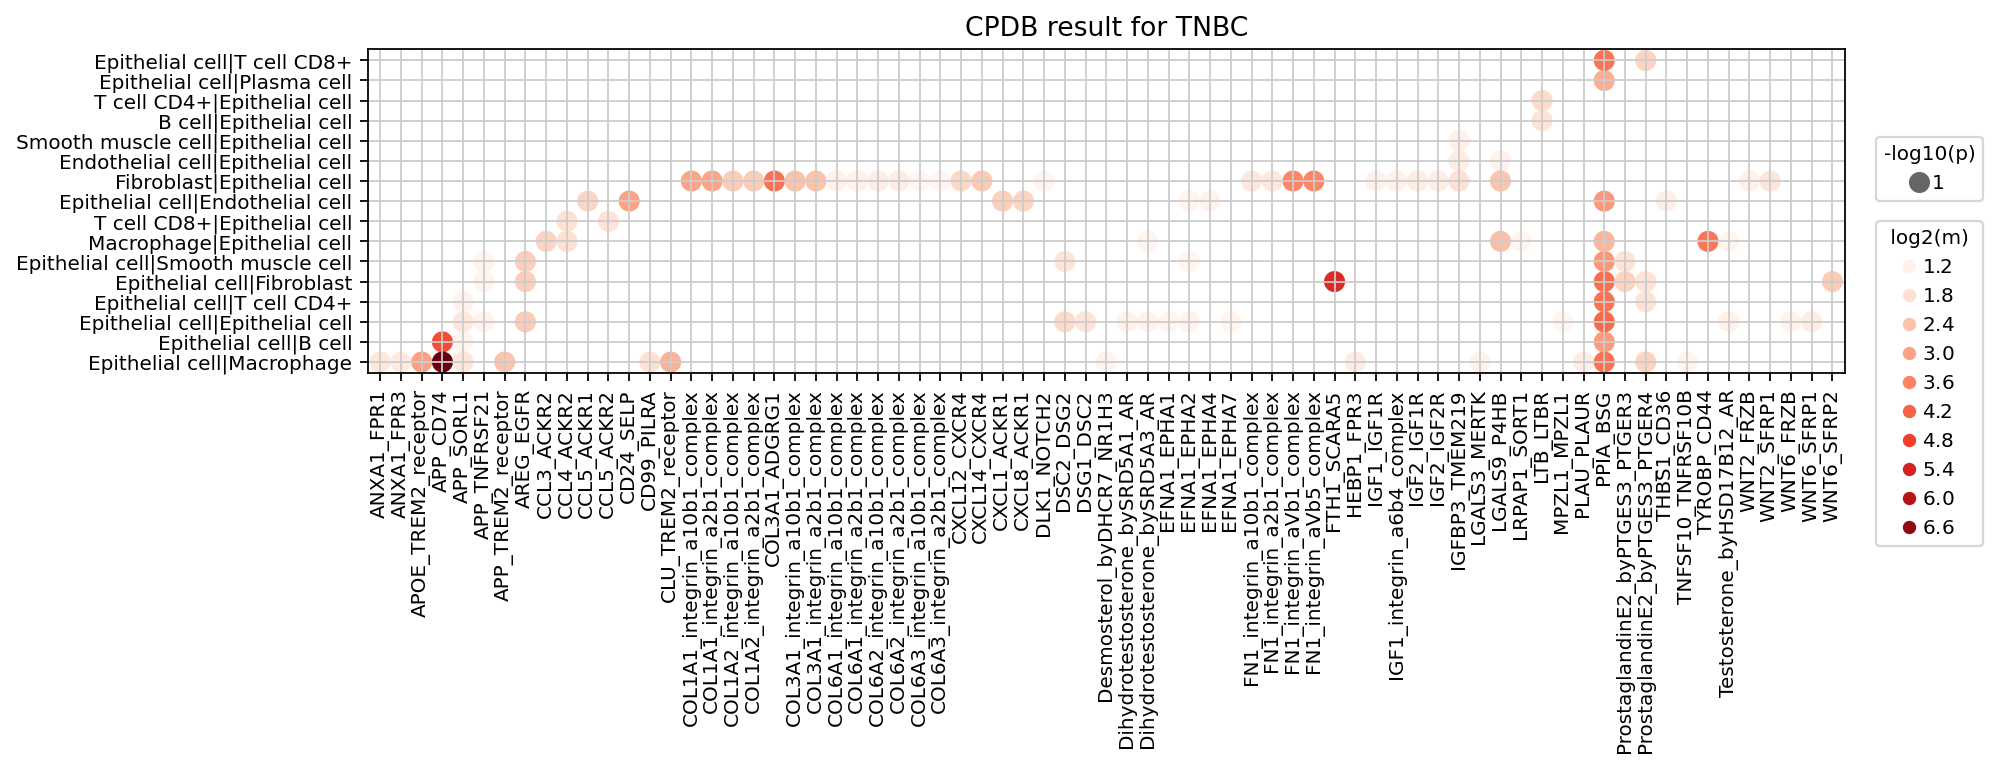

In [90]:
target_cells = ['Epithelial cell']
pval_cutoff = 0.01
mean_cutoff = 1 

df_dct_to_plot = {}
for key in df_dct.keys():
    df = df_dct[key]
    b1 = df['pval'] <= pval_cutoff
    b2 = df['mean'] >= mean_cutoff
    b3 = df['cell_A'].isin(target_cells) | df['cell_B'].isin(target_cells)
    df_dct_to_plot[key] = df.loc[b1&b2&b3, :]

## CCI: circle plot, dotplot, pairwise venn diagram
for g in df_dct_to_plot.keys():
    
    dfv = df_dct_to_plot[g]
    idxs = list(dfv.index.values)
    
    dfs = dfv.sort_values(by = ['gene_pair', 'cell_pair'])
    
    if dfs.shape[0] > 0:
        ax = plot_cci_dot( dfs, 
                           title = 'CPDB result for %s' % g, title_fs = 12, 
                           legend_fs = 9, legend_mkr_sz = 9, 
                           tick_fs = 9, xtick_rot = 90, xtick_ha = 'center',
                           dpi = 80, swap_ax = True )

### DEG per celltype

In [95]:
nc_deg_dct = adata_t.uns['DEG_stat']
df_deg_dct = adata_t.uns['DEG']
df_deg_dct.keys()

dict_keys(['B cell', 'Epithelial cell', 'Macrophage', 'Plasma cell', 'T cell CD4+', 'T cell CD8+'])

In [96]:
target_cell = 'Epithelial cell'

df_deg = df_deg_dct[target_cell]
nc_deg = nc_deg_dct[target_cell]

nc_deg

{'ER+_vs_others': {'ER+': 681, 'others': 1413},
 'HER2+_vs_others': {'HER2+': 568, 'others': 1526},
 'TNBC_vs_others': {'TNBC': 845, 'others': 1249}}

In [97]:
clst = list(df_deg.keys())
clst

['ER+_vs_others', 'HER2+_vs_others', 'TNBC_vs_others']

In [98]:
df_deg[clst[0]].head()

log2_FC           pval       pval_adj  mean_test  mean_ref  \
ESR1            7.068  6.333322e-252  7.283320e-248   2.506281  0.080560   
PIP             6.462  1.036247e-185  1.191684e-181   3.639441  0.351046   
AGR3            4.325  7.698983e-178  8.853831e-174   2.795703  0.569313   
STC2            5.167  1.922632e-136  2.211026e-132   2.020717  0.167335   
RP11-53O19.1    6.363  2.496177e-125  2.870604e-121   1.502443  0.041556   

              nz_pct_test  nz_pct_ref  nz_pct_score     Rp  
ESR1             0.872247    0.067233      0.758902  0.872  
PIP              0.839941    0.163482      0.587759  0.840  
AGR3             0.873715    0.198868      0.560762  0.874  
STC2             0.687225    0.104742      0.550802  0.687  
RP11-53O19.1     0.590308    0.035386      0.549271  0.590

B cell


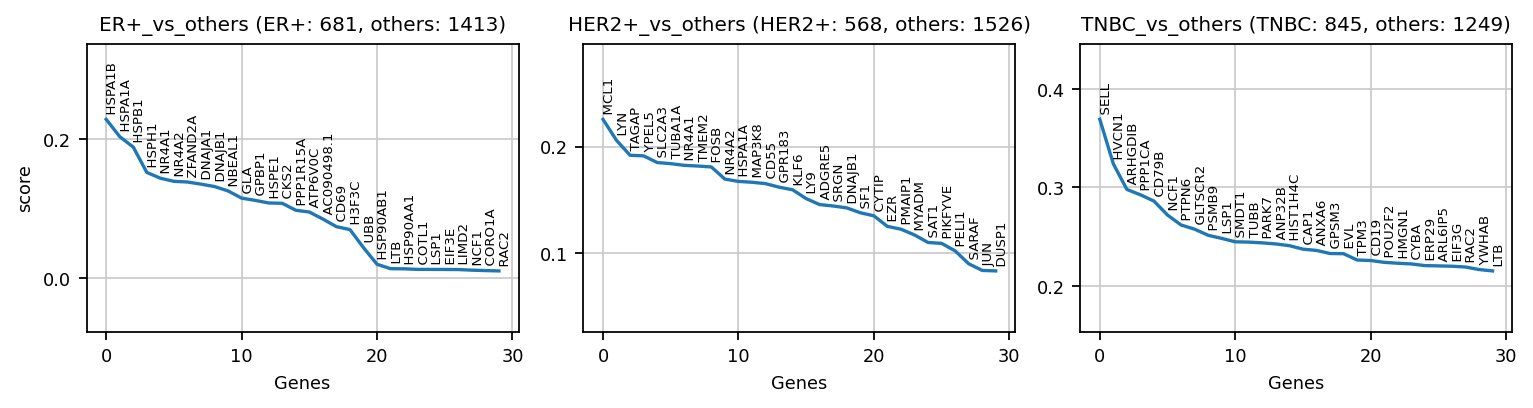

Epithelial cell


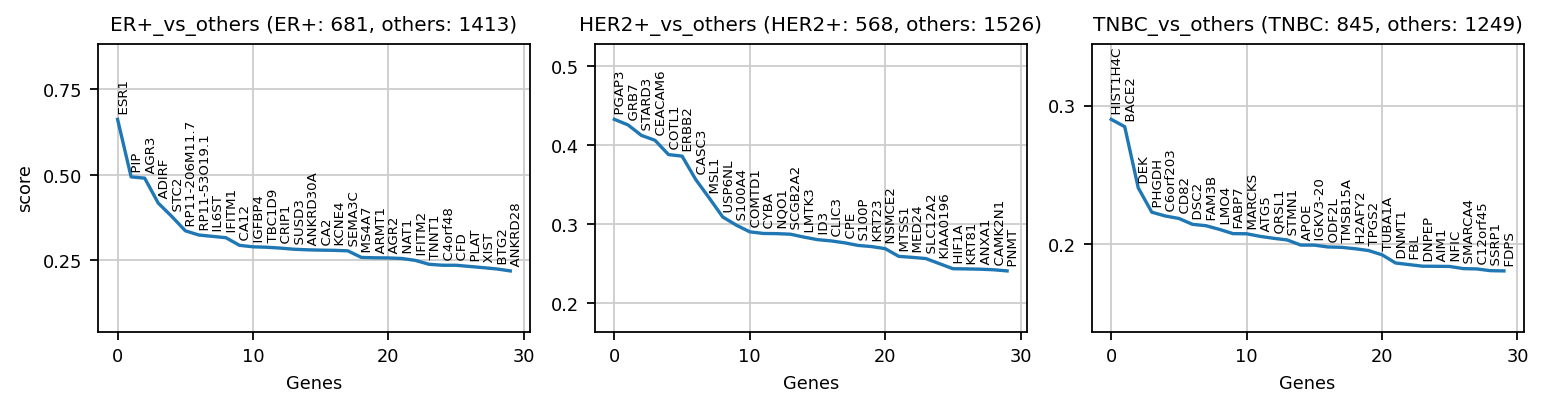

Macrophage


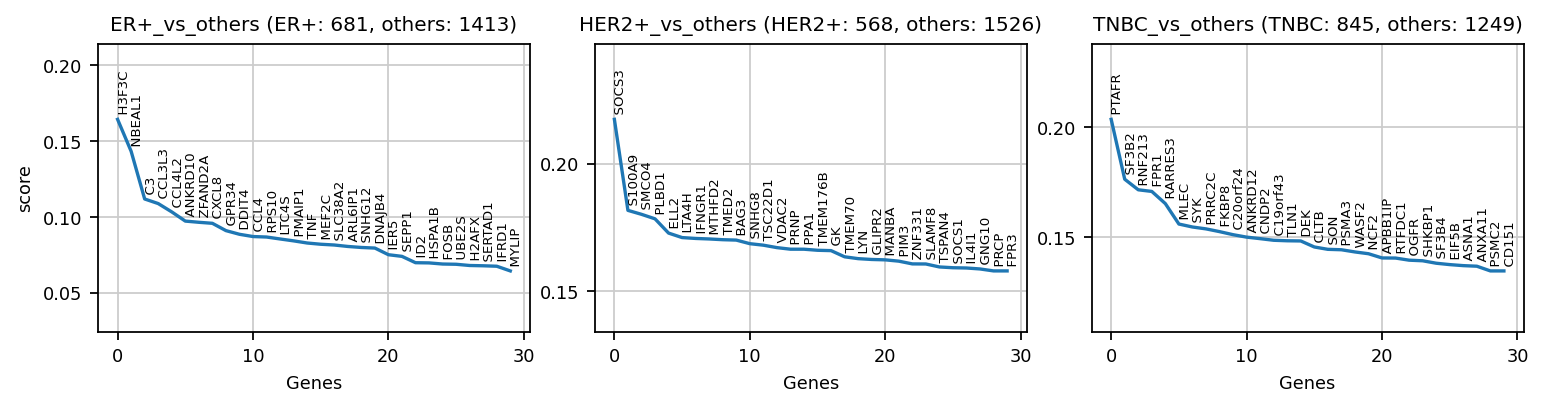

Plasma cell


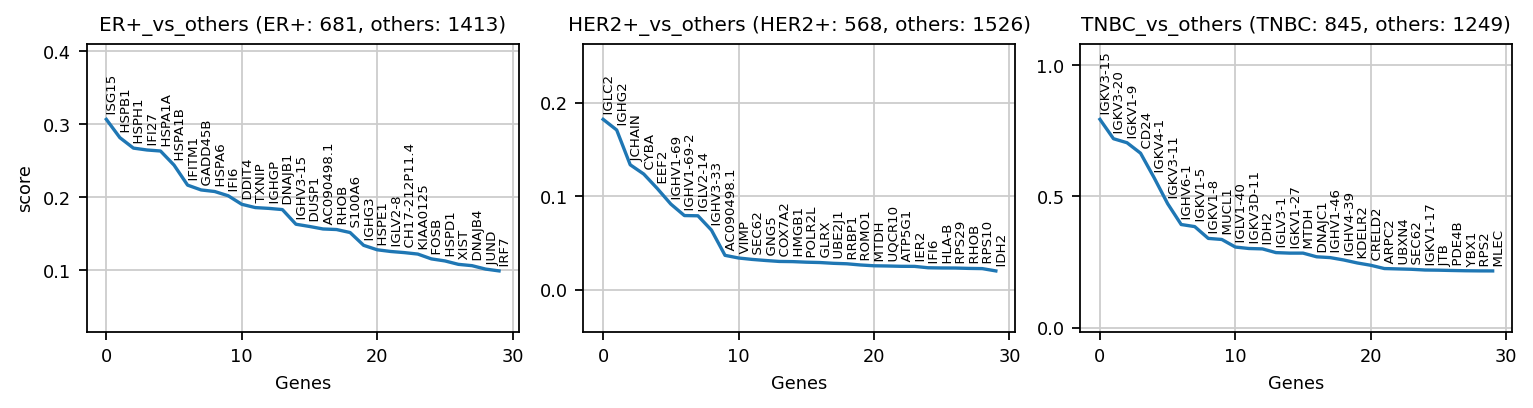

T cell CD4+


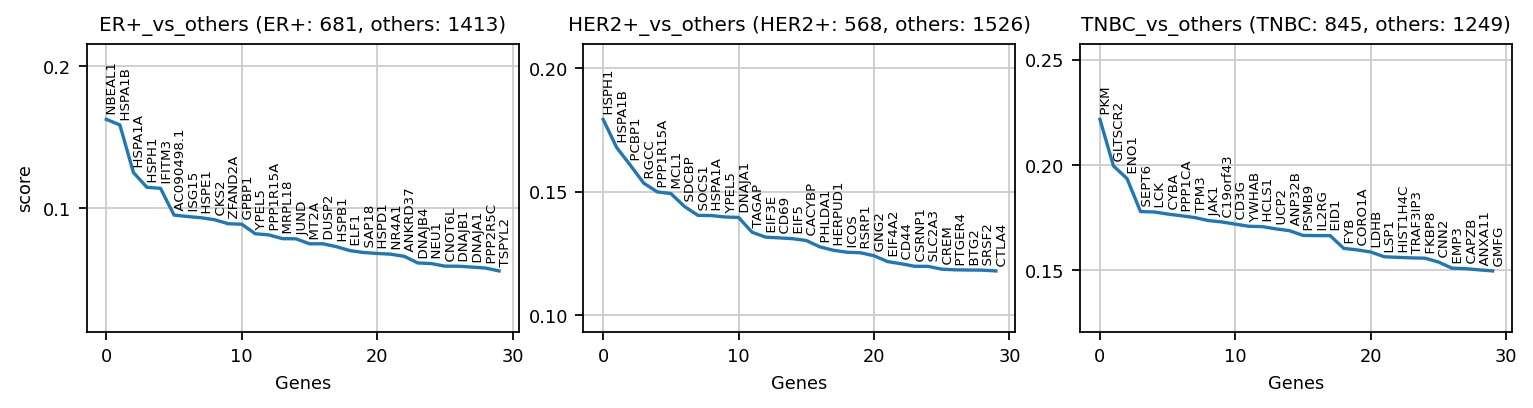

T cell CD8+


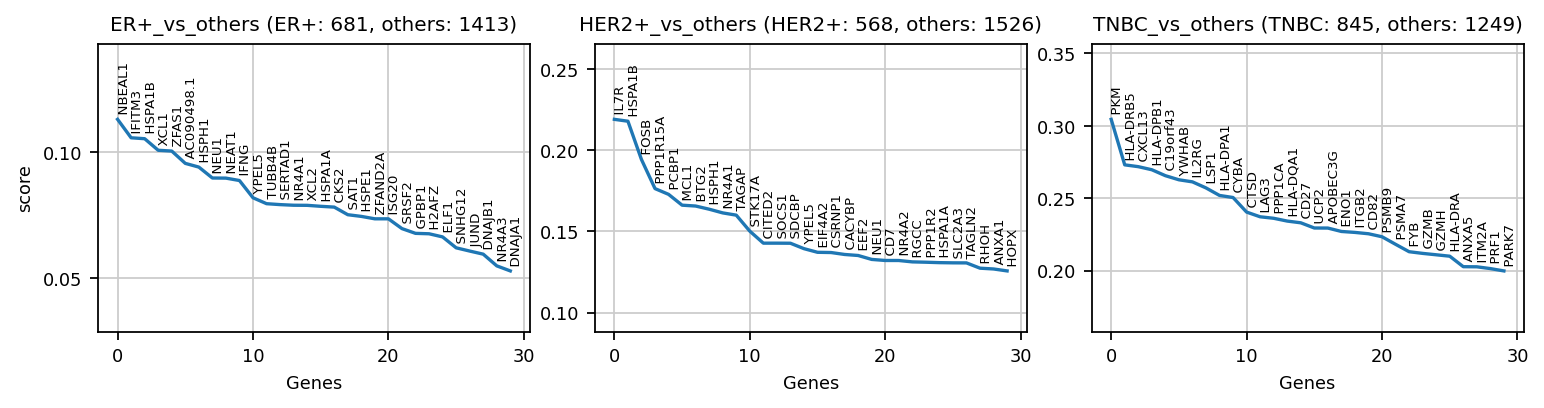

In [99]:
for key in df_deg_dct.keys():
    df_deg = df_deg_dct[key]
    for k in df_deg.keys():
        df_deg[k]['score'] = df_deg[k]['nz_pct_score']*df_deg[k]['Rp']

    print(key)
    plot_deg( df_deg, reference = 'score', n_genes_to_show = 30, pval_cutoff = 0.05, 
              figsize = (3.3,2), text_fs = 6, title_fs = 9, label_fs = 8, 
              tick_fs = 8, ncols = 3, wspace = 0.15, hspace = 0.2, 
              deg_stat_dct = nc_deg, show_log_pv = False )


### Markers based on the percentage of marker expressing cells

In [100]:
deg_keys = list(df_deg.keys())
deg_keys

['ER+_vs_others', 'HER2+_vs_others', 'TNBC_vs_others']

In [101]:
## Select celltype to explore
target_cell = 'Epithelial cell'

df_deg = df_deg_dct[target_cell]
nc_deg = nc_deg_dct[target_cell]

subtype_mkr_dict = get_markers_from_deg( df_deg, N_mkrs = 30, ref_col = 'score', 
                                 nz_pct_test_min = 0.5, 
                                 nz_pct_ref_max = 0.4, 
                                 rem_common = False )

## Print results   
for key in subtype_mkr_dict.keys():
    subtype_mkr_dict[key].sort()
    print('%s (%i): ' % (key, len(subtype_mkr_dict[key])), subtype_mkr_dict[key])        


ER+ (30):  ['ADIRF', 'AGR3', 'ANKRD28', 'ANKRD30A', 'ARMT1', 'BTG2', 'C15orf48', 'CA12', 'CA2', 'CFD', 'CRIP1', 'ESR1', 'IFITM1', 'IFITM2', 'IGFBP4', 'IL6ST', 'KCNE4', 'MS4A7', 'MUC1', 'NAT1', 'PIP', 'PLAT', 'RP11-206M11.7', 'RP11-53O19.1', 'SEMA3C', 'STC2', 'SUSD3', 'TBC1D9', 'TNNT1', 'XIST']
HER2+ (30):  ['ANXA1', 'CAMK2N1', 'CASC3', 'CEACAM6', 'CLIC3', 'COMTD1', 'COTL1', 'CPE', 'CYBA', 'ERBB2', 'GRB7', 'HIF1A', 'ID3', 'KIAA0196', 'KRT23', 'KRT81', 'LMTK3', 'MED24', 'MSL1', 'MTSS1', 'NQO1', 'NSMCE2', 'PGAP3', 'S100A4', 'S100P', 'SCGB2A2', 'SLC12A2', 'STARD3', 'TATDN1', 'USP6NL']
TNBC (30):  ['AIM1', 'ATG5', 'BACE2', 'C12orf45', 'C6orf203', 'CD82', 'CKS1B', 'DEK', 'DNMT1', 'DNPEP', 'DSC2', 'FBL', 'H2AFY2', 'HIST1H4C', 'HNRNPUL1', 'KLHDC3', 'LMO4', 'MAD2L2', 'MARCKS', 'NASP', 'ODF2L', 'PHGDH', 'QRSL1', 'SF3A2', 'SLC25A33', 'SMARCA4', 'SSRP1', 'TPGS2', 'TUBA1A', 'YBX3']


In [102]:
sample_col = 'sample'
cond_col = 'condition'

adata_s = adata_t[:,:]

## UMAP with celltype annotation, sample, condition
sc.pp.normalize_total(adata_s, target_sum=1e4)
sc.pp.log1p(adata_s)

b = adata_s.obs['celltype_minor'] == target_cell
adata_s = adata_s[b,:]

## Assign new sample name with subtype prefix
slst = list(adata_s.obs[sample_col])
clst = list(adata_s.obs[cond_col])

plst2 = []
for s, c in zip(slst, clst):
    plst2.append('%s - %s' % (c, s))
        
pid_field = 'pid_e'
adata_s.obs[pid_field] = plst2

## Select samples with its No. of cells greater than 40
pcnt = adata_s.obs[pid_field].value_counts()
b = pcnt >= 100
plst = list(pcnt.index.values[b])

# display(pcnt[plst])
print('N_samples: ', len(plst), 'ave. N_cells: ', pcnt[plst].mean())

b = adata_s.obs[pid_field].isin(plst)
adata_ss = adata_s[b,:]

N_samples:  6 ave. N_cells:  589.6666666666666


Num markers selected: 54 -> 54


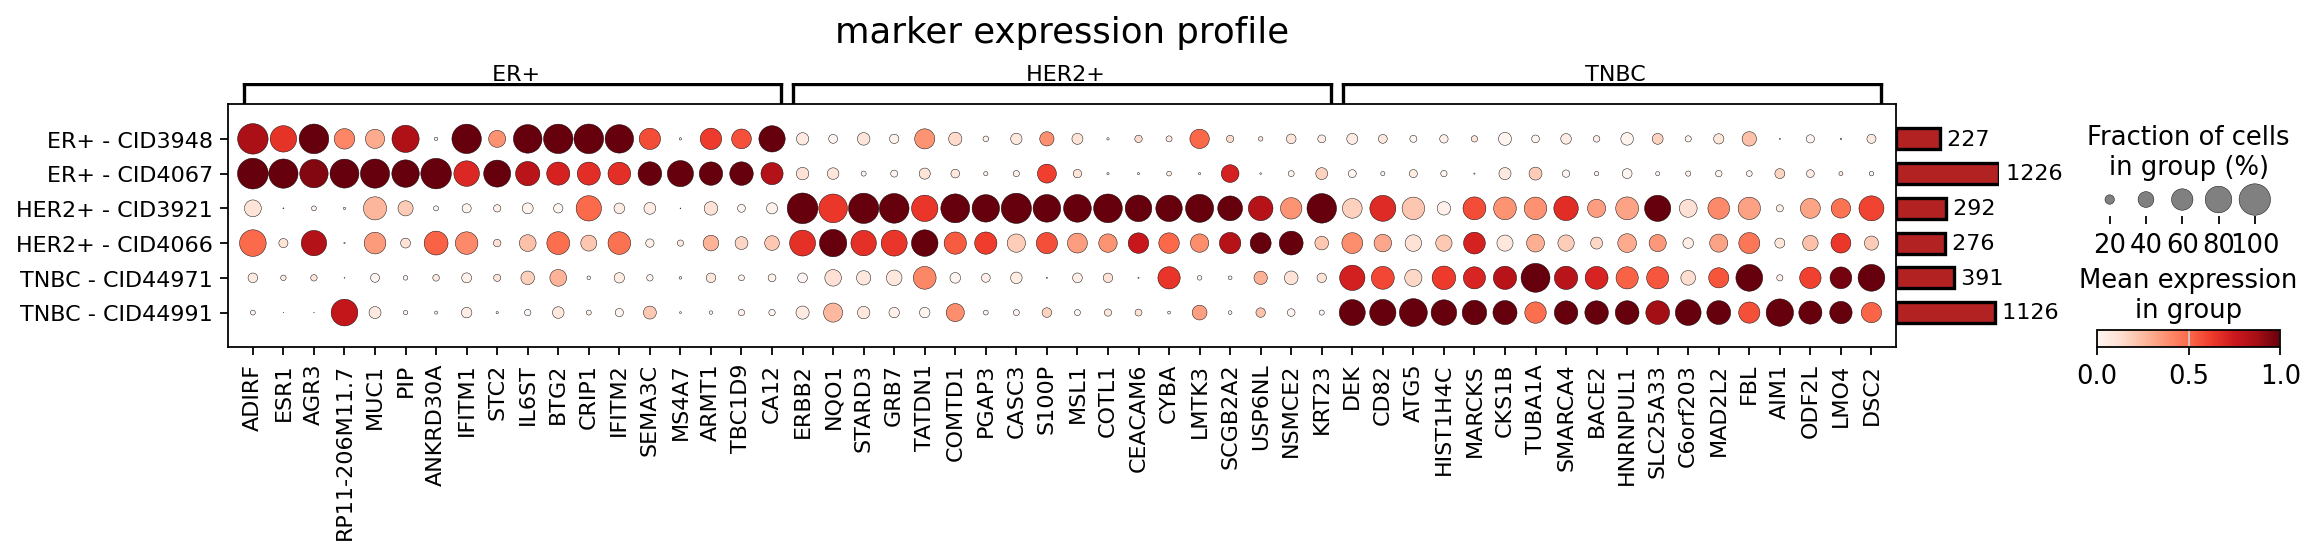

In [103]:
title = 'marker expression profile'
plot_marker_exp(  adata_ss, markers = subtype_mkr_dict, 
                  var_group_col = cond_col, group_col = 'pid_e', 
                  title = title, title_y_pos = 1.2, title_fs = 16, 
                  text_fs = 10, linewidth = 1.5, standard_scale = 'var', 
                  var_group_rotation = 0, var_group_height = 1.2, 
                  nz_frac_max = 1, nz_frac_cutoff = 0.05,  
                  rem_mkrs_common_in_N_groups_or_more = 0, N_cells_min = 20,
                  N_markers_per_group_max = 18, N_markers_total = 200,
                  figsize = (16,2), swap_ax = False, legend = True )

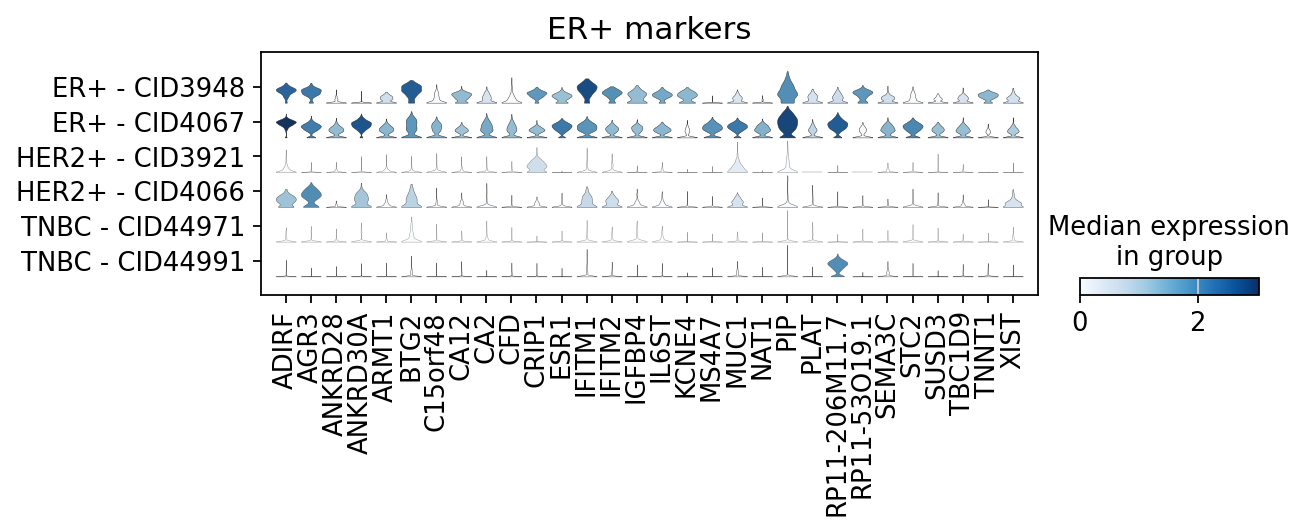

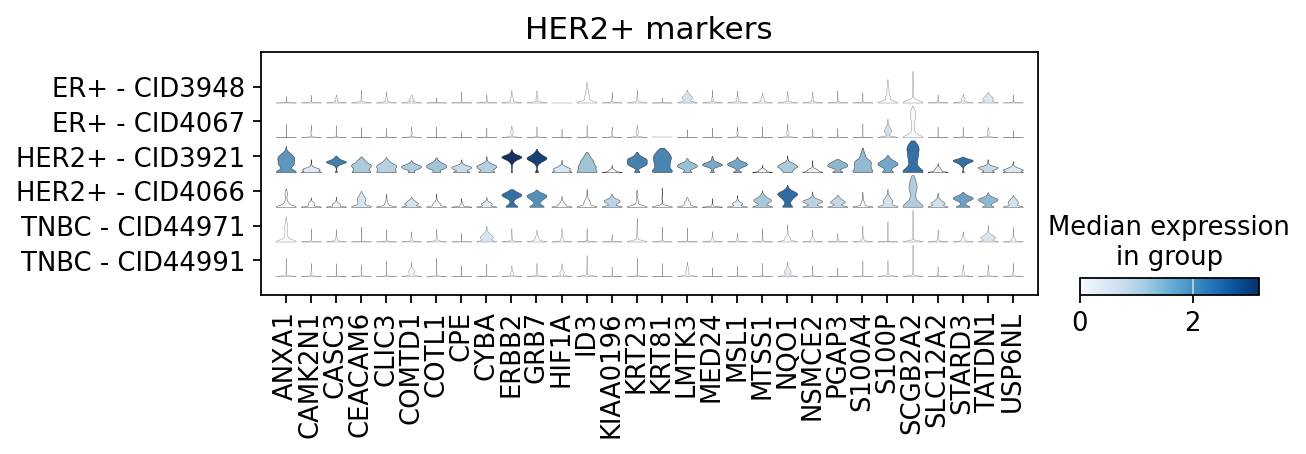

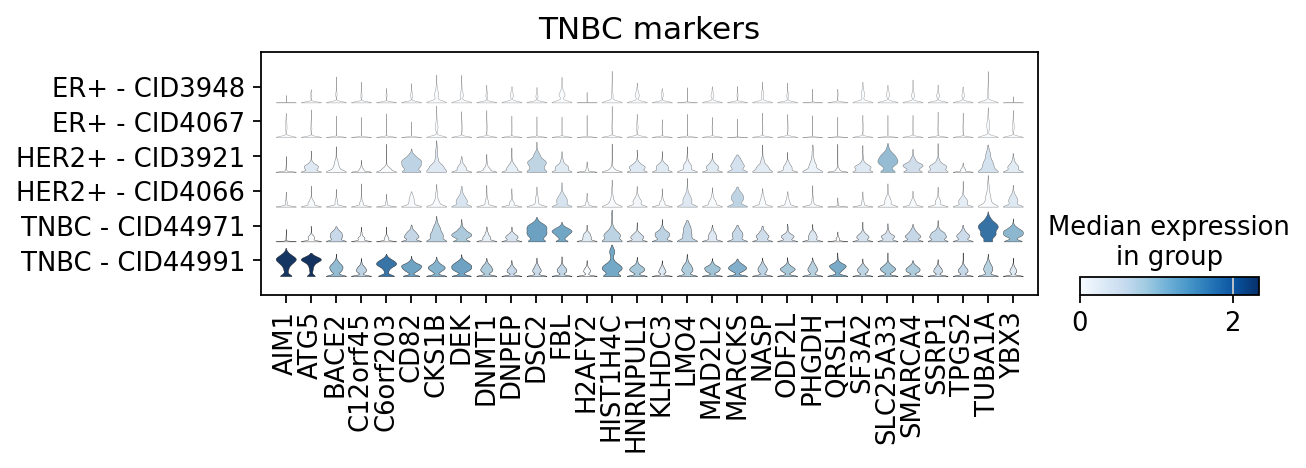

In [104]:
nn = len(subtype_mkr_dict.keys())
for k, key in enumerate(list(subtype_mkr_dict.keys())):
    # ax = plt.subplot(1,nn,k+1)
    items_to_plot = subtype_mkr_dict[key]
    sc.pl.stacked_violin(adata_ss, items_to_plot, groupby='pid_e', 
                         title = '%s markers' % key, rotation=90, swap_axes = False, figsize = (8,2))
plt.show()

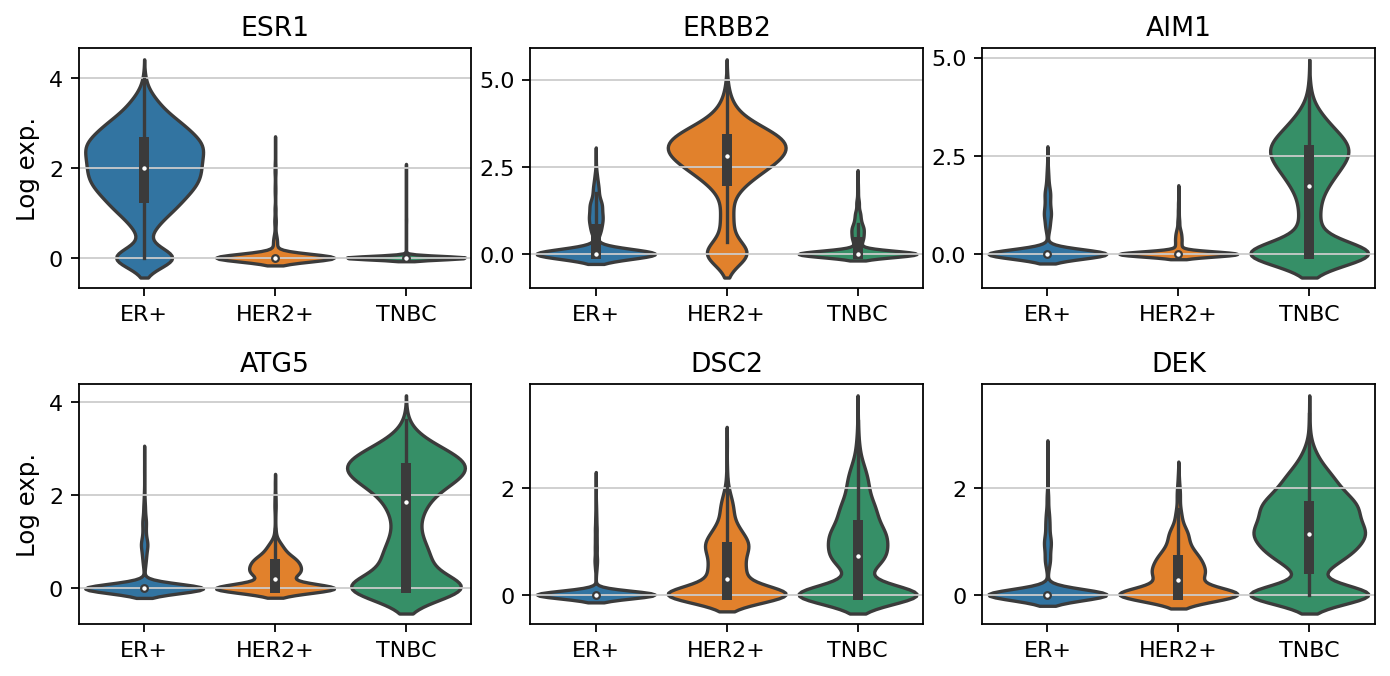

In [106]:
items_to_plot = ['ESR1', 'ERBB2', 'AIM1', 'ATG5', 'DSC2', 'DEK']

df = adata_ss[:, items_to_plot].to_df()
df['group'] = adata_ss.obs['condition']

plot_violin( df, genes_lst = items_to_plot, group_col = 'group', 
             scale = 'width', group_order = None, inner = 'box', 
             width = 0.9, linewidth = 0.3, bw = 'scott', figsize = (3,2), 
             text_fs = 10, title = None, title_fs = 14, title_y_pos = 1, 
             label_fs = 11, tick_fs = 10, tick_rot = 0, tick_ha = 'center', 
             ncols = 3, wspace = 0.15, hspace = 0.4 )

### GSA

In [119]:
df_dct_gsa_up = adata_t.uns['GSA_up']
df_dct_gsa_dn = adata_t.uns['GSA_down']

In [120]:
df_dct_gsa_up.keys()

dict_keys(['B cell', 'Epithelial cell', 'Macrophage', 'Plasma cell', 'T cell CD4+', 'T cell CD8+'])

In [121]:
target_cell = 'Epithelial cell'
gsa_keys = list(df_dct_gsa_up[target_cell].keys())
gsa_keys

['ER+_vs_others', 'HER2+_vs_others', 'TNBC_vs_others']

In [122]:
target_cond = gsa_keys[2]
df_res_gsa = df_dct_gsa_up[target_cell][target_cond]
df_res_gsa.head()

pval  pval_adj  \
Alzheimer disease                            1.759871e-04  1.000000   
Amino sugar and nucleotide sugar metabolism  4.605367e-02  1.000000   
Amyotrophic lateral sclerosis                6.368960e-09  0.000124   
Apoptosis                                    4.214610e-03  1.000000   
Autophagy                                    3.837575e-02  1.000000   

                                                                                         genes  \
Alzheimer disease                            COX4I1;NDUFS2;APOE;TNF;PSMD13;PSMD11;NDUFB7;SL...   
Amino sugar and nucleotide sugar metabolism  GALE;GMPPA;PMM1;UGP2;UXS1;GNPDA1;GALK1;CYB5R2;...   
Amyotrophic lateral sclerosis                COX4I1;GPX3;NDUFS2;TNF;PSMD13;PSMD11;NDUFB7;MT...   
Apoptosis                                    BAK1;EIF2S1;RIPK1;TNF;NFKBIA;ACTB;CTSV;TP53;IT...   
Autophagy                                    NRBF2;MLST8;ATG4B;EIF2S1;RRAGB;HMGB1;MAP3K7;ST...   

                                             overlap  pw_size  -log(p-val)  \
Alzheimer disease                                118      369     3.754519   
Amino sugar and nucleotide sugar metabolism       17       48     1.336736   
Amyotrophic lateral sclerosis                    135      364     8.195932   
Apoptosis                                         48      142     2.375243   
Autophagy                                         42      137     1.415943   

                                             -log(q-val)  \
Alzheimer disease                                0.00000   
Amino sugar and nucleotide sugar metabolism      0.00000   
Amyotrophic lateral sclerosis                    3.90728   
Apoptosis                                        0.00000   
Autophagy                                        0.00000   

                                                                                    Term  \
Alzheimer disease                                                      Alzheimer disease   
Amino sugar and nucleotide sugar metabolism  Amino sugar and nucleotide sugar metabolism   
Amyotrophic lateral sclerosis                              Amyotrophic lateral sclerosis   
Apoptosis                                                                      Apoptosis   
Autophagy                                                                      Autophagy   

                                             Ind  
Alzheimer disease                              1  
Amino sugar and nucleotide sugar metabolism    1  
Amyotrophic lateral sclerosis                  1  
Apoptosis                                      1  
Autophagy                                      1

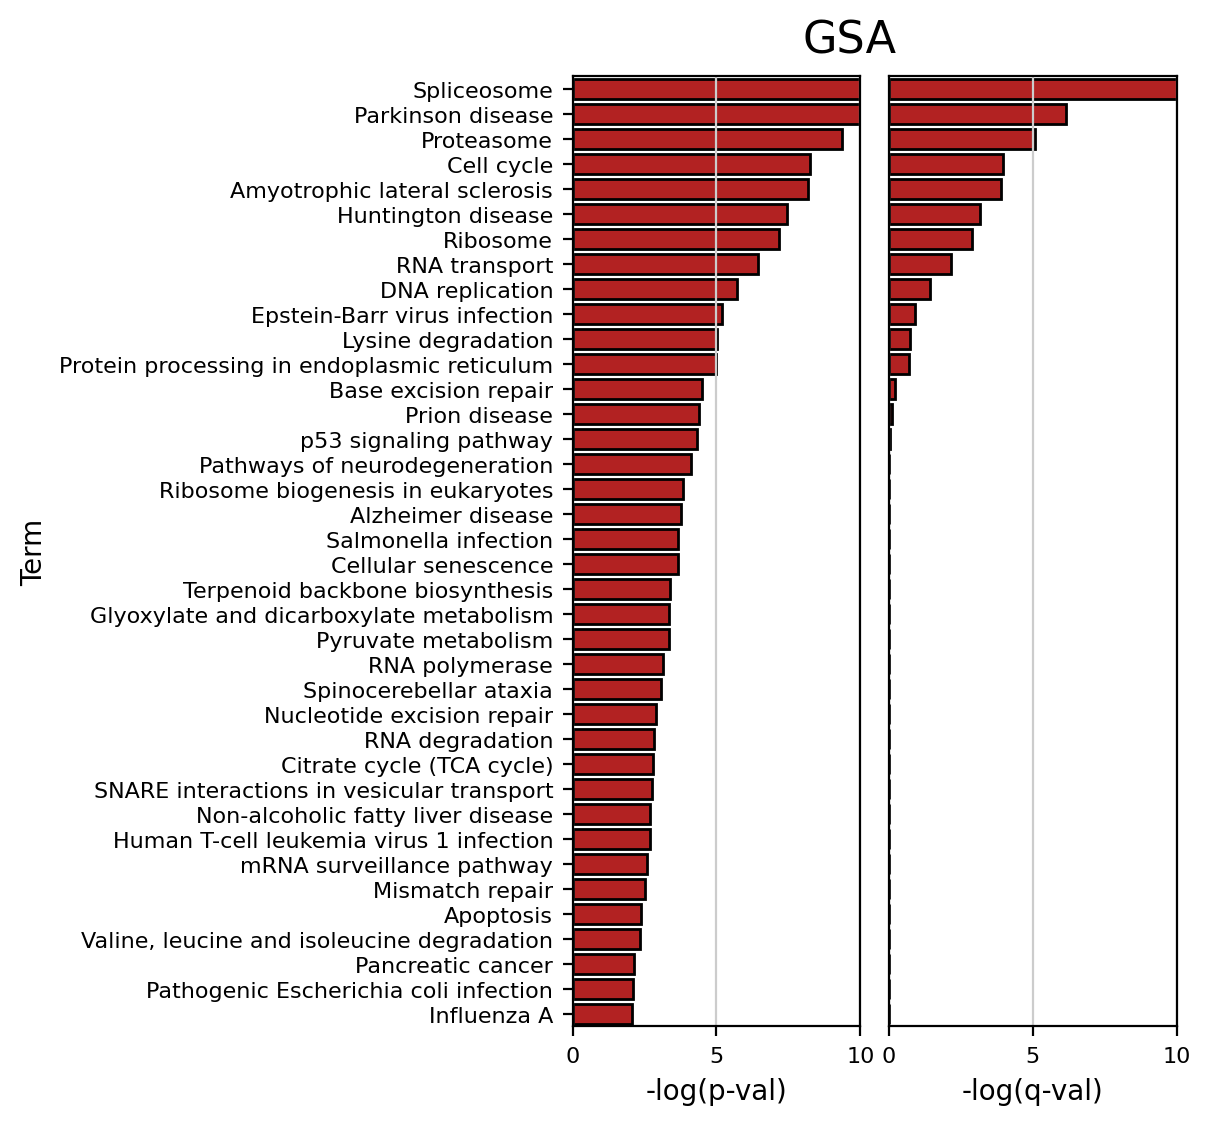

True

In [123]:
df_res = df_res_gsa.copy(deep = True)
df_res = df_res.loc[df_res['-log(p-val)'] >= 2 ]

terms_sel = list(df_res.index.values)
items_to_plot = ['-log(p-val)', '-log(q-val)'] 
lims = [[0, 10], [0, 10]] 

df_res = df_res.sort_values(by = '-log(p-val)', ascending = False)

plot_gsa_res( df_res, terms_sel, items_to_plot, lims, 
              title = 'GSA', title_pos = (0.5, 1), title_fs = 16, title_ha = 'center',
              label_fs = 10, tick_fs = 8, wspace=0.1, hspace=0.25, 
              Ax = None)

### plot GSA summary

In [124]:
gsa_res = adata_t.uns['GSA_up']
gsa_res.keys()

dict_keys(['B cell', 'Epithelial cell', 'Macrophage', 'Plasma cell', 'T cell CD4+', 'T cell CD8+'])

In [125]:
gsa_res2 = {}
for k in gsa_res.keys():
    dct = gsa_res[k]
    dct2 = {}
    for kk in dct.keys():
        dft = dct[kk]
        b = dft['pval'] <= 0.001
        dct2[kk] = dft.loc[b,:]
    gsa_res2[k] = dct2

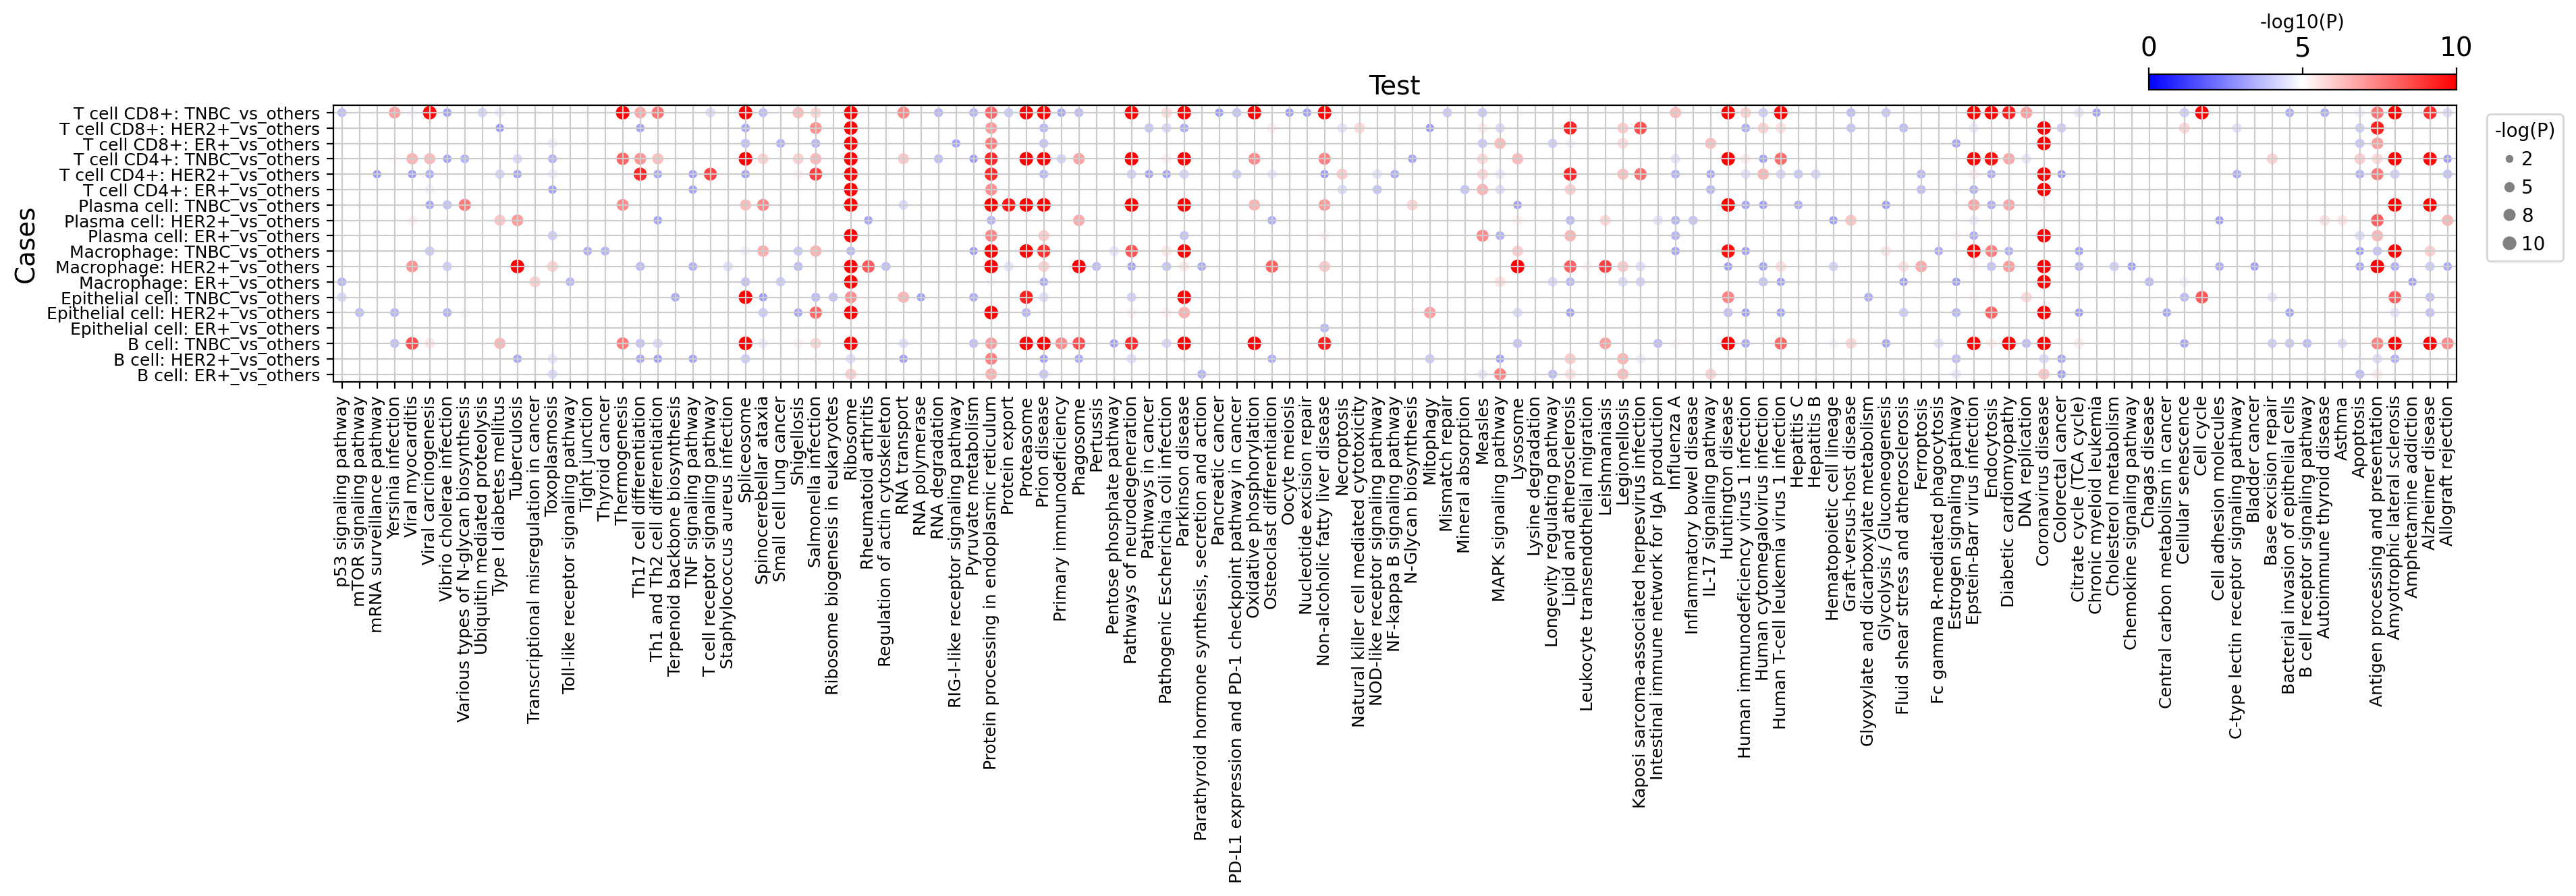

In [126]:
plot_gsa_all( gsa_res2, title = 'Test', title_fs = 14, 
              tick_fs = 9, xtick_rot = 90, xtick_ha = 'center',
              label_fs = 10, legend_fs = 10, swap_ax = True, 
              dot_size = 40 )